# Desarrollar un prototipo de red neuronal artificial para el pronóstico de eventos críticos por partículas PM2.5 en el centro de la ciudad de Manizales

# Estudiante: David Eduardo Garcia Correa

# Código: 202040058444

#Fundación Universitaria Los Libertadores

El siguiente trabajo pretende desarrollar un modole de pronostico de calidad de aire en el centro de la ciudad de Manizales -Caldas: partiendo de un conjunto de datos más o menos procesado (la preparación de los datos es una etapa clave que precede al machine learning), se desea crear un modelo que permita predecir con éxito el comportamiento o valor que toma la variable PM2_5 a partir de un cierto grupo de observaciones.
Los datos disponibles son:
PM2_5: Se denominan partículas PM 2.5 a aquellas partículas cuyo diámetro es igual o inferior a 2.5 micras. Una micra o micrómetro es una unidad de longitud que equivale a una milésima parte de un milímetro, por lo que estas partículas son indetectables para el ojo humano. Este grado de indetectabilidad supone incluso un factor añadido a la importancia que hay que derivar en estas partículas. micrometros/m3
Temperatura: La temperatura​es una magnitud escalar que sistematiza la noción vulgar de frío y caliente haciéndola medible mediante un termómetro. Unidades Grados Centigrados.
Velocidad_Viento: La velocidad del viento mide la componente horizontal del desplazamiento del aire en un punto y en un instante determinados. Se mide mediante un anemómetro, y la unidad de medida es habitualmente metros por segundo (m/s). Las ausencias de viento se denominan calmas.
Precipitación: La precipitación, es agua liberada desde las nubes en forma de lluvia, aguanieve, nieve o granizo. Es el principal proceso por el cual el agua retorna a la Tierra. en mm.
SO2: El Dióxido de azufre (SO2) es un gas incoloro e irritante contaminante del aire. El dióxido de azufre no es inflamable, ni explosivo, es muy soluble en agua y es más denso que el aire ambiental. microgramos/m3
O3: El ozono es un potente agente oxidante que se forma mediante una compleja serie de reacciones fotoquímicas en las que participa la radiación solar, el dióxido de nitrógeno (NO2) y compuestos orgánicos volátiles.
CO: El monóxido de carbono, también denominado óxido de carbono (II), gas carbonoso y anhídrido carbonoso (los dos últimos cada vez más en desuso), cuya fórmula química es CO, es un gas incoloro y altamente tóxico.

El set de datos Datacontiene información sobre la emisión de material particulado PM2_5 emitido en el centro de la ciudad de Manizales - Caldas. Además de esta variable, incluye 9 variables adicionales climatológicas. La base de datos presentaba valores ausentes, por lo cual se utilizaron datos capturados de equipos cercanos como la estación de la Gobernación de Caldas, el aeropuerto La Nubia, La Central Hidroelectrica de Caldas- Chec, Aguas de Manizales, datos que se encuentran publicados en CDIAC del Instituto de estudios ambientales IDEA de la Universidad Nacional Sede Manizales.

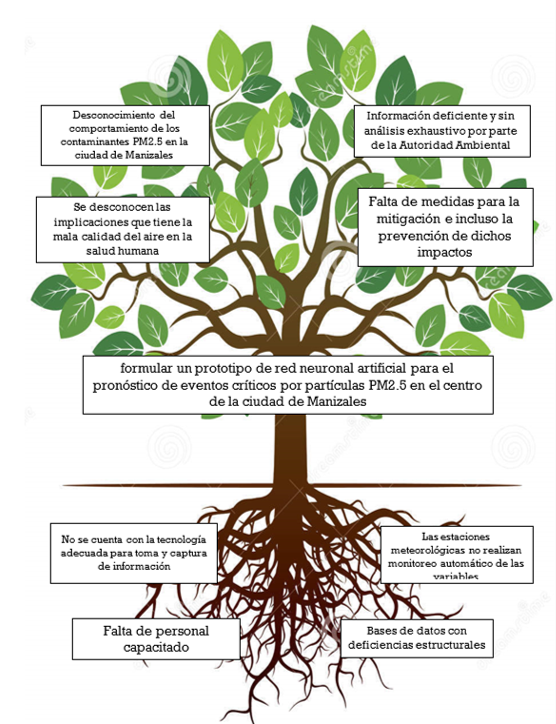

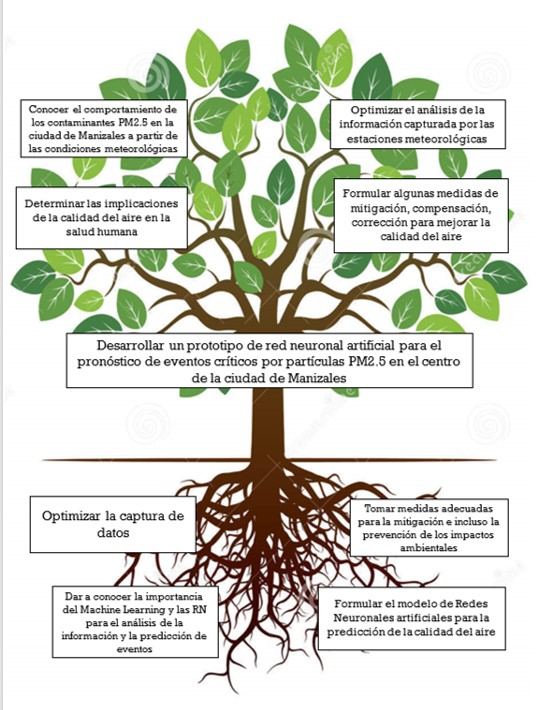

Para el desarollo del ejercicio se requiere de varias librerias como son Keras y Tensorflow (u otro similar).

In [ ]:
## Cargar Librerías 

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler


Cargamos el dataset

In [ ]:
##Opción base de datos 4
#https://drive.google.com/file/d/1dmRx_m-MnB9FSVb0Q9LYul9KPJEJlV3R/view?usp=sharing
url = 'https://drive.google.com/uc?id=1dmRx_m-MnB9FSVb0Q9LYul9KPJEJlV3R'
Data = pd.read_excel(url)
Data

Fecha  PM2_5  Temperatura  ...    SO2     O3      CO
0   2019-01-01   14.0         19.5  ...   5.21  13.36  865.83
1   2019-01-02   12.0         18.5  ...   4.59  10.35  591.11
2   2019-01-03    8.0         17.1  ...   5.12  14.10  305.53
3   2019-01-04   16.0         17.6  ...   5.23  14.92  672.64
4   2019-01-05   10.0         18.9  ...   4.86  17.78  357.10
..         ...    ...          ...  ...    ...    ...     ...
598 2020-08-21   11.5          6.9  ...   1.64  15.09  395.27
599 2020-08-22   10.6          3.6  ...   1.45  14.81  567.00
600 2020-08-23    8.0          9.4  ...  18.30  15.07  851.20
601 2020-08-24    8.2          8.9  ...  25.85  10.52  544.68
602 2020-08-25    8.9          7.5  ...  18.52  15.07  629.35

[603 rows x 8 columns]

Análisis exploratorio
Antes de entrenar un modelo predictivo, o incluso antes de realizar cualquier cálculo con un nuevo conjunto de datos, es muy importante realizar una exploración descriptiva de los mismos. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores. Algunos ejemplos frecuentes son:
Que una columna se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.
Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.
Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.
Además, este análisis inicial puede dar pistas sobre qué variables son adecuadas como predictores en un modelo..

In [ ]:
Data.head()

Fecha  PM2_5  Temperatura  ...   SO2     O3      CO
0 2019-01-01   14.0         19.5  ...  5.21  13.36  865.83
1 2019-01-02   12.0         18.5  ...  4.59  10.35  591.11
2 2019-01-03    8.0         17.1  ...  5.12  14.10  305.53
3 2019-01-04   16.0         17.6  ...  5.23  14.92  672.64
4 2019-01-05   10.0         18.9  ...  4.86  17.78  357.10

[5 rows x 8 columns]

In [ ]:
# Tipo de cada columna
Data.info()
# En pandas, el tipo "object" hace referencia a strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             603 non-null    datetime64[ns]
 1   PM2_5             603 non-null    float64       
 2   Temperatura       603 non-null    float64       
 3   Velocidad_Viento  603 non-null    float64       
 4   Precipitación     603 non-null    float64       
 5   SO2               603 non-null    float64       
 6   O3                603 non-null    float64       
 7   CO                603 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 37.8 KB


In [ ]:
Data['PM2_5'] = Data.PM2_5.astype('int64')
Data['Temperatura'] = Data.Temperatura.astype('int64')
Data['Velocidad_Viento'] = Data.Velocidad_Viento.astype('int64')
Data['Precipitación'] = Data.Precipitación.astype('int64')
Data['SO2'] = Data.SO2.astype('int64')
Data['O3'] = Data.O3.astype('int64')
Data['CO'] = Data.CO.astype('int64')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             603 non-null    datetime64[ns]
 1   PM2_5             603 non-null    int64         
 2   Temperatura       603 non-null    int64         
 3   Velocidad_Viento  603 non-null    int64         
 4   Precipitación     603 non-null    int64         
 5   SO2               603 non-null    int64         
 6   O3                603 non-null    int64         
 7   CO                603 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 37.8 KB


In [ ]:
#Dimensiones del dataset
Data.shape

(603, 8)

Número de observaciones y valores ausentes
Junto con el estudio del tipo de variables, es básico conocer el número de observaciones disponibles y si todas ellas están completas. Los valores ausentes son muy importantes a la hora de crear modelos, la mayoría de algoritmos no aceptan observaciones incompletas o bien se ven muy influenciados por ellas. Aunque la imputación de valores ausentes es parte del preprocesado y, por lo tanto, debe de aprenderse únicamente con los datos de entrenamiento, su identificación se tiene que realizar antes de separar los datos para asegurar que se establecen todas las estrategias de imputación necesarias.
Imputación de valores ausentes
La gran mayoría de algoritmos no aceptan observaciones incompletas, por lo que, cuando el set de datos contiene valores ausentes, se puede:

* Eliminar aquellas observaciones que estén incompletas.
* Eliminar aquellas variables que contengan valores ausentes.
* Tratar de estimar los valores ausentes empleando el resto de información disponible (imputación).
Las primeras dos opciones, aunque sencillas, suponen perder información. La eliminación de observaciones solo puede aplicarse cuando se dispone de muchas y el porcentaje de registros incompletos es muy bajo. En el caso de eliminar variables, el impacto dependerá de cuánta información aporten dichas variables al modelo. Cuando se emplea la imputación, es muy importante tener en cuenta el riesgo que se corre al introducir valores en predictores que tengan mucha influencia en el modelo. Supóngase un estudio médico en el que, cuando uno de los predictores es positivo, el modelo predice casi siempre que el paciente está sano. Para un paciente cuyo valor de este predictor se desconoce, el riesgo de que la imputación sea errónea es muy alto, por lo que es preferible obtener una predicción basada únicamente en la información disponible. Esta es otra muestra de la importancia que tiene que el analista conozca el problema al que se enfrenta y pueda así tomar la mejor decisión.
El módulo sklearn.impute incorpora varios métodos de imputación distintos:
SimpleImputer: permite imputaciones empleando un valor constante o un estadístico (media, mediana, valor más frecuente) de la misma columna en la que se encuentra el valor ausente.
IterativeImputer: permite imputar el valor de una columna teniendo en cuenta el resto de columnas. En concreto, se trata de un proceso iterativo en el que, en cada iteración, una de las variables se emplea como variable respuesta y el resto como predictores. Una vez obtenido el modelo, se emplea para predecir las posiciones vacías de esa variable. Este proceso se lleva a cabo con cada variable y se repite el ciclo max_iter veces para ganar estabilidad. La implementación de sklearn.impute.IterativeImputer permite que se emplee casi cualquiera de sus algoritmos para crear los modelos de imputación (KNN, RandomForest, GradientBoosting...).
KNNImputer: es un caso concreto de IterativeImputer en el que se emplea k-Nearest Neighbors como algoritmo de imputación.
A pesar de ser un método muy utilizado, imputar utilizando KNN presenta dos problemas: su coste computacional elevado hace que solo sea aplicable en conjuntos de datos de tamaño pequeño o moderado. Si hay variables categóricas, debido a la dificultad de medir "distancias" en este contexto, puede dar lugar a resultados poco realistas. Por estas dos razones, es más recomendable utilizar un modelo tipo Random Forest IterativeImputer(predictor = RandomForestRegressor()).
Con el argumento add_indicator=True se crea automáticamente una nueva columna en la que se indica con el valor 1 qué valores han sido imputados. Esto puede ser útil tanto para identificar las observaciones en las que se ha realizado alguna imputación como para utilizarla como un predictor más en el modelo.

In [ ]:
#Número de observaciones ausentes por variable
Data.isna().sum().sort_values()

Fecha               0
PM2_5               0
Temperatura         0
Velocidad_Viento    0
Precipitación       0
SO2                 0
O3                  0
CO                  0
dtype: int64

Ninguna variable contiene valores ausentes. Nota: La imputación de valores ausentes se puede realizar mediante varias estrategias
Notemos que el dataframe que estamos utilizando con pandas tiene como indice en la primera columna con el año y el día. Esto nos permitira hacer filtrados directamente y algunas operaciones especiales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

#Data = pd.read_excel(url,  parse_dates=[0], header=None,index_col=0, squeeze=True,names=['fecha','PM2_5', 'Temperatura', 'Velocidad_Viento', 'Precipitación', 'SO2', 'O3', 'CO'])
#Data.head()

In [ ]:
## Por ejemplo podemos ver de qué fechas tenemos datos con:

print(Data.Fecha.min())
print(Data.Fecha.max())

2019-01-01 00:00:00
2020-08-25 00:00:00


Analisis de patrones de caracteristicas individuales mediante visualización

In [ ]:
%%capture
! pip install seaborn

Importe los paquetes de visualización "Matplotlib" y "Seaborn", no se olvide de "% matplotlib en línea" para dibujar en el mismo cuaderno Jupyter.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

¿Cómo elegir el método de visualización correcto?
Al visualizar variables individuales, es importante entender primero con qué tipo de variable está tratando. Esto nos ayudará a encontrar el método de visualización correcto para esa variable.

In [ ]:
# lista de los tipos de datos para cada columna
print(Data.dtypes)

Fecha               datetime64[ns]
PM2_5                        int64
Temperatura                  int64
Velocidad_Viento             int64
Precipitación                int64
SO2                          int64
O3                           int64
CO                           int64
dtype: object


In [ ]:
Data.corr()

PM2_5  Temperatura  ...        O3        CO
PM2_5             1.000000     0.115795  ...  0.084252  0.121776
Temperatura       0.115795     1.000000  ...  0.250754 -0.129482
Velocidad_Viento -0.043137    -0.079228  ... -0.019788 -0.009600
Precipitación     0.016524     0.040007  ... -0.017483  0.056213
SO2               0.043341     0.194379  ... -0.058605  0.013675
O3                0.084252     0.250754  ...  1.000000 -0.229326
CO                0.121776    -0.129482  ... -0.229326  1.000000

[7 rows x 7 columns]

Variables numéricas continuas:
Las variables numéricas continuas son variables que pueden contener cualquier valor dentro de cierto rango. Las variables numéricas continuas pueden tener el tipo "int64" o "float64". Una excelente manera de visualizar estas variables es mediante el uso de diagramas de dispersión con líneas ajustadas.
Para comenzar a comprender la relación (lineal) entre una variable individual y el PM2_5. Podemos hacer esto usando "regplot", que traza el diagrama de dispersión más la línea de regresión ajustada para los datos.

In [ ]:
Data[['PM2_5','Temperatura', 'Velocidad_Viento', 'Precipitación', 'SO2', 'O3', 'CO' ]].corr()

PM2_5  Temperatura  ...        O3        CO
PM2_5             1.000000     0.115795  ...  0.084252  0.121776
Temperatura       0.115795     1.000000  ...  0.250754 -0.129482
Velocidad_Viento -0.043137    -0.079228  ... -0.019788 -0.009600
Precipitación     0.016524     0.040007  ... -0.017483  0.056213
SO2               0.043341     0.194379  ... -0.058605  0.013675
O3                0.084252     0.250754  ...  1.000000 -0.229326
CO                0.121776    -0.129482  ... -0.229326  1.000000

[7 rows x 7 columns]

In [ ]:
Variables = Data[['PM2_5','Temperatura', 'Velocidad_Viento','Precipitación','SO2','O3','CO']]

In [ ]:
X=pd.DataFrame(Variables)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   PM2_5             603 non-null    int64
 1   Temperatura       603 non-null    int64
 2   Velocidad_Viento  603 non-null    int64
 3   Precipitación     603 non-null    int64
 4   SO2               603 non-null    int64
 5   O3                603 non-null    int64
 6   CO                603 non-null    int64
dtypes: int64(7)
memory usage: 33.1 KB


In [ ]:
X.corr()

PM2_5  Temperatura  ...        O3        CO
PM2_5             1.000000     0.115795  ...  0.084252  0.121776
Temperatura       0.115795     1.000000  ...  0.250754 -0.129482
Velocidad_Viento -0.043137    -0.079228  ... -0.019788 -0.009600
Precipitación     0.016524     0.040007  ... -0.017483  0.056213
SO2               0.043341     0.194379  ... -0.058605  0.013675
O3                0.084252     0.250754  ...  1.000000 -0.229326
CO                0.121776    -0.129482  ... -0.229326  1.000000

[7 rows x 7 columns]

In [ ]:
X[["Temperatura", "PM2_5"]].corr()

Temperatura     PM2_5
Temperatura     1.000000  0.115795
PM2_5           0.115795  1.000000

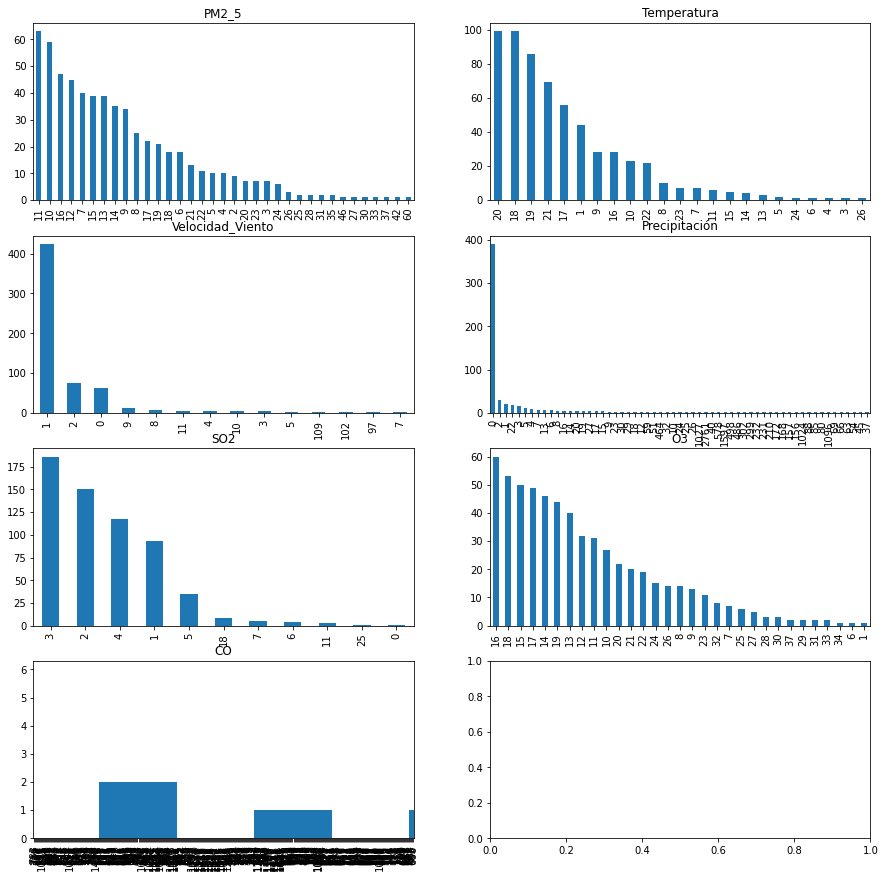

In [ ]:
fig, axs = plt.subplots(4,2, figsize=(15,15))
X.PM2_5.value_counts().plot.bar(ax = axs[0,0], title = 'PM2_5')
X.Temperatura.value_counts().plot.bar(ax = axs[0,1], title = 'Temperatura')
X.Velocidad_Viento.value_counts().plot.bar(ax = axs[1,0], title = 'Velocidad_Viento')
X.Precipitación.value_counts().plot.bar(ax = axs[1,1], title = 'Precipitación')
X.SO2.value_counts().plot.bar(ax = axs[2,0], title = 'SO2')
X.O3.value_counts().plot.bar(ax = axs[2,1], title = 'O3')
X.CO.value_counts().plot.bar(ax = axs[3,0], title = 'CO')
plt.show()

(-0.9000000000000004, 62.9)

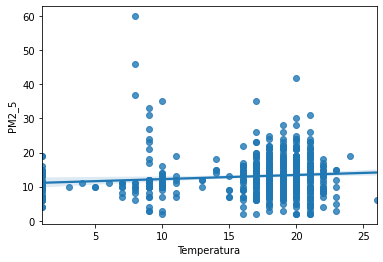

In [ ]:
sns.regplot(x="Temperatura", y="PM2_5", data=X)
plt.ylim()

(-12.881456643048207, 63.47054555443087)

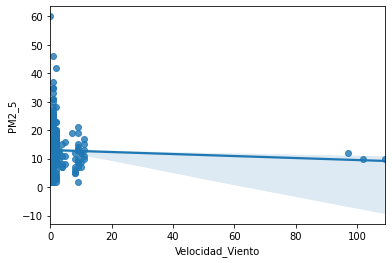

In [ ]:
sns.regplot(x="Velocidad_Viento", y="PM2_5", data=X)
plt.ylim()

(-0.9000000000000004, 62.9)

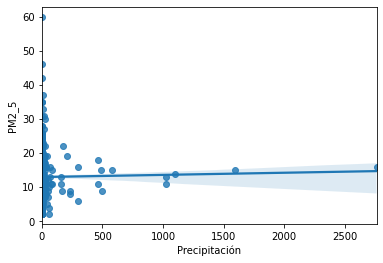

In [ ]:
sns.regplot(x="Precipitación", y="PM2_5", data=X)
plt.ylim()

(-0.9000000000000004, 62.9)

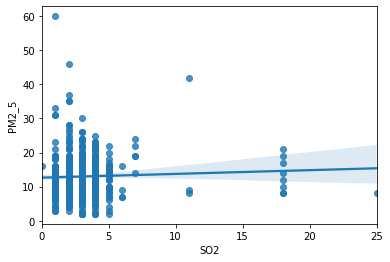

In [ ]:
sns.regplot(x="SO2", y="PM2_5", data=X)
plt.ylim()

(-0.9000000000000004, 62.9)

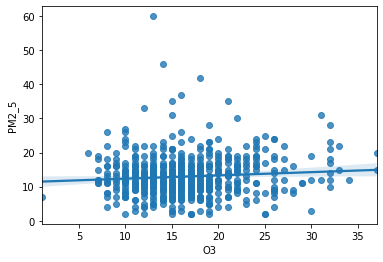

In [ ]:
sns.regplot(x="O3", y="PM2_5", data=X)
plt.ylim()

(-0.9000000000000004, 62.9)

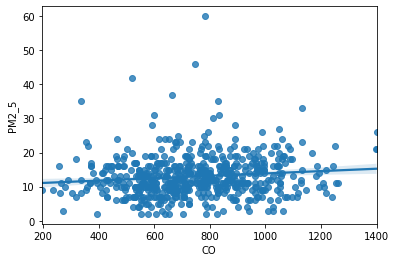

In [ ]:
sns.regplot(x="CO", y="PM2_5", data=X)
plt.ylim()

In [ ]:
X[['CO','PM2_5']].corr()

CO     PM2_5
CO     1.000000  0.121776
PM2_5  0.121776  1.000000

Las variables climatológicas no parecen ser buenos predictores de la concentración de PM2_5, las líneas de regresión estan cerca del eje horizontal. Además los puntos estan muy dispersos y lejos de las linea ajustada y dan como resultado una regresión líneal débil.
Variables categóricas
Estas son variables que describen una 'característica' de una unidad de datos y se seleccionan de un pequeño grupo de categorías. Las variables categóricas pueden tener el tipo "objeto" o "int64". Una buena forma de visualizar variables categóricas es mediante el uso de diagramas de caja.

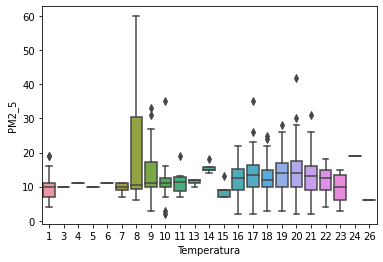

In [ ]:
sns.boxplot(x="Temperatura", y="PM2_5", data=X)

Podemos observar que las distribuciones de PM2_5 entre las diferentes grados de temperatura tiene una superposición significativa, por lo que la temperatura no sería un buen predictor de la calidad del aire medido por la concentración de PM2_5.

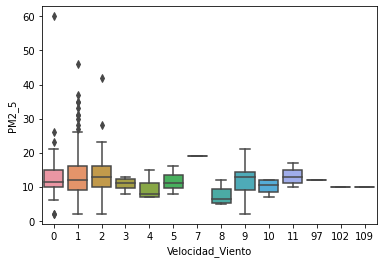

In [ ]:
sns.boxplot(x="Velocidad_Viento", y="PM2_5", data=X)

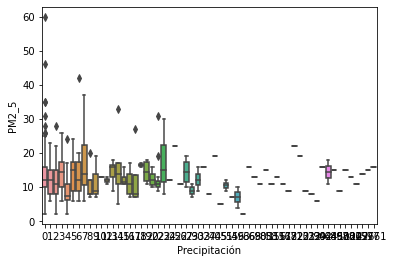

In [ ]:
sns.boxplot(x="Precipitación", y="PM2_5", data=X)

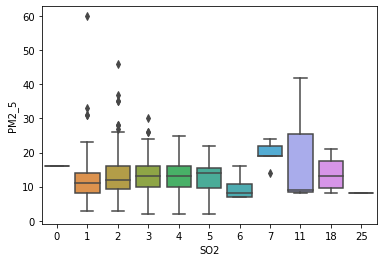

In [ ]:
sns.boxplot(x="SO2", y="PM2_5", data=X)

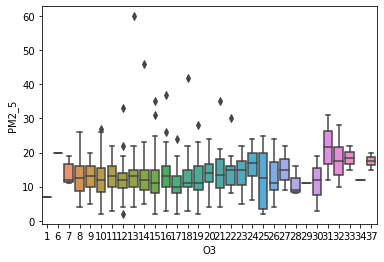

In [ ]:
sns.boxplot(x="O3", y="PM2_5", data=X)

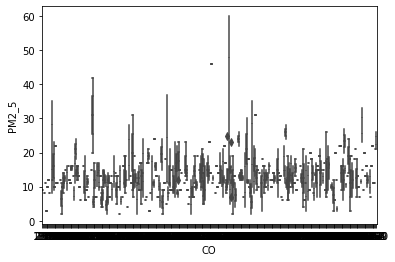

In [ ]:
sns.boxplot(x="CO", y="PM2_5", data=X)

In [ ]:
X.describe()

PM2_5  Temperatura  ...          O3           CO
count  603.000000   603.000000  ...  603.000000   603.000000
mean    12.981758    16.341625  ...   16.651741   744.588723
std      6.001495     5.752888  ...    5.289755   210.286136
min      2.000000     1.000000  ...    1.000000   195.000000
25%      9.000000    16.000000  ...   13.000000   591.500000
50%     12.000000    18.000000  ...   16.000000   726.000000
75%     16.000000    20.000000  ...   19.000000   887.000000
max     60.000000    26.000000  ...   37.000000  1400.000000

[8 rows x 7 columns]

# Pronóstico de Series Temporales con Redes Neuronales en Python

¿Qué es una serie temporal y qué tiene de especial?
Una serie temporal es un conjunto de muestras tomadas a intervalos de tiempo regulares. Es interesante analizar su comportamiento al mediano y largo plazo, intentando detectar patrones y poder hacer pronósticos de cómo será su comportamiento futuro. Lo que hace <<especial>> a una Time Series a diferencia de un “problema” de Regresión son dos cosas:

Es dependiente del Tiempo. Esto rompe con el requerimiento que tiene la regresión lineal de que sus observaciones sean independientes.
Suelen tener algún tipo de estacionalidad, ó de tendencias a crecer ó decrecer. Pensemos en cuánto más producto vende una heladería en sólo 4 meses al año que en el resto de estaciones.
Ejemplo de series temporales son:
Capturar la temperatura, humedad y presión de una zona a intervalos de 15 minutos.
Valor de las acciones de una empresa en la bolsa minuto a minuto.
Ventas diarias (ó mensuales) de una empresa.
Producción en Kg de una cosecha cada semestre.

# Predicción de Series Temporales Univariable

# Como se observó una baja correlación entre las variables se va a realizar el ejercicio utilizando solo la variable de interes PM2_5

In [ ]:
# Cargar librerias con Pandas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#https://docs.google.com/spreadsheets/d/1c9bI9VIk_i1Mv1AylsUy0q-i_0W6rJVs/edit?usp=sharing&ouid=101417461973163795592&rtpof=true&sd=true
url_1 = 'https://drive.google.com/uc?id=1c9bI9VIk_i1Mv1AylsUy0q-i_0W6rJVs'
df = pd.read_excel(url_1,  parse_dates=[0], header=None,index_col=0, squeeze=True,names=['Fecha','PM2_5', 'Temperatura', 'Velocidad_Viento',	'Precipitación',	'SO2',	'O3',	'CO'])
df.head()


PM2_5  Temperatura  Velocidad_Viento  ...   SO2     O3      CO
Fecha                                             ...                     
2019-01-01   14.0         19.5               2.1  ...  5.21  13.36  865.83
2019-01-02   12.0         18.5               1.9  ...  4.59  10.35  591.11
2019-01-03    8.0         17.1               2.2  ...  5.12  14.10  305.53
2019-01-04   16.0         17.6               0.7  ...  5.23  14.92  672.64
2019-01-05   10.0         18.9               3.3  ...  4.86  17.78  357.10

[5 rows x 7 columns]

In [ ]:
Variable_PM2_5 = df[['PM2_5']]
Variable_PM2_5



PM2_5
Fecha            
2019-01-01   14.0
2019-01-02   12.0
2019-01-03    8.0
2019-01-04   16.0
2019-01-05   10.0
...           ...
2020-08-21   11.5
2020-08-22   10.6
2020-08-23    8.0
2020-08-24    8.2
2020-08-25    8.9

[603 rows x 1 columns]

# Notemos una cosa antes de seguir: el dataframe que cargamos con pandas tiene como Indice nuestra primera columna con las fechas. Esto es para que nos permita hacer filtrados por fecha directamente y algunas operaciones especiales.

# Por ejemplo, podemos ver de qué fechas tenemos datos con:

In [ ]:
print(df.index.min())
print(df.index.max())

2019-01-01 00:00:00
2020-08-25 00:00:00


Presumiblemente tenemos las concentraciones de PM2_5 de 2019 y 2020 hasta el mes de agosto. Y Ahora veamos cuantas muestras tenemos de cada año:

In [ ]:
print(len(df['2019']))
print(len(df['2020']))

365
238


# Visualización de datos:

# Veamos algunas gráficas sobre los datos que tenemos. Pero antes… aprovechemos los datos estadísticos que nos brinda pandas con describe()

In [ ]:
df.PM2_5.describe()

count    603.000000
mean      13.267032
std        5.978288
min        2.000000
25%        9.900000
50%       12.200000
75%       16.000000
max       60.600000
Name: PM2_5, dtype: float64

# Son en total 603 registros, la media de la concentración de PM2_5 es de 13.26 y una desviación estandar de 5.97, es decir por lo general estaremos entre 19.23 y 7.29.



# De hecho aprovechemos el tener indice de fechas con pandas y saquemos los promedios mensuales:

In [ ]:
meses =Variable_PM2_5.resample('M').mean()
meses

PM2_5
Fecha                
2019-01-31  11.709677
2019-02-28  12.321429
2019-03-31  13.229032
2019-04-30  17.536667
2019-05-31  12.183871
2019-06-30  14.333333
2019-07-31  17.935484
2019-08-31  16.995484
2019-09-30   8.200000
2019-10-31  11.877419
2019-11-30  13.120000
2019-12-31  13.380645
2020-01-31  10.837419
2020-02-29  16.851724
2020-03-31  15.077419
2020-04-30   8.383333
2020-05-31  10.574194
2020-06-30  13.983333
2020-07-31  14.283871
2020-08-31  12.360000

# Y visualicemos esas medias mensuales para la concentración de PM2_5:

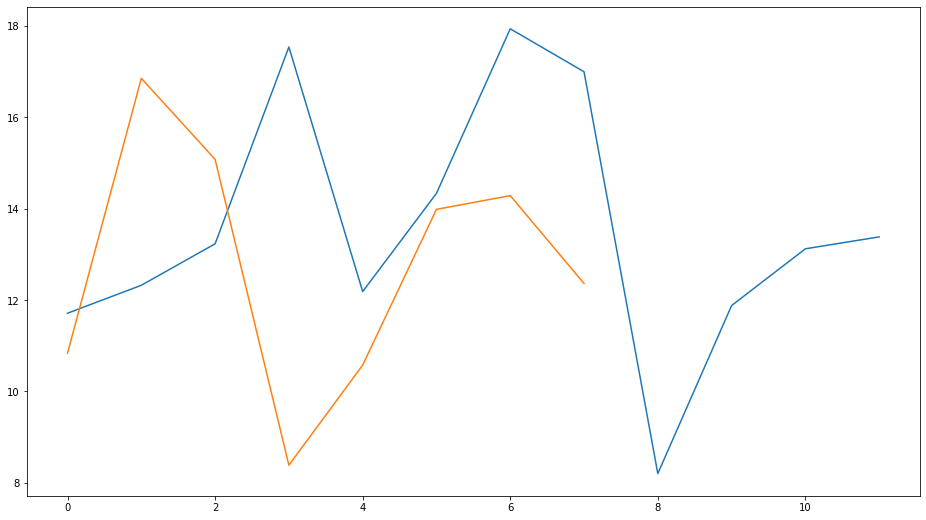

In [ ]:
plt.plot(meses['2019'].values)
plt.plot(meses['2020'].values)

# Vemos que en 2019 (en azul) tenemos un inicio de año con un ascenso en la concentración de PM2.5, luego comienza a subir de manera exponencial hasta la llegada del periodo escolar y de universidades en donde en los meses marzo, abril se tiene el mayor flujo vehicular. Para los meses de junio y julio se presenta un descenso vertiginoso el cual puede deberse al periodo de vacaciones donde se disminuye el tránsito vehicular en la ciudad de Manizales. Finalmente vuelve a disminuir y tiene un pequeño pico entre agosto y octubre. También vemos que 2020 (naranja) se comporta diferente del año inmediatamente anterior. Para ese año se observa un incremento vertiginoso de la concentración de PM2.5 en los primeros meses del año, pero desciende rápidamente debido posiblemente a la pandemia generada por el Covid-19 y al confinamiento decretado por el Gobierno Nacional y Local. No se cuenta con datos para la concentración de PM2.5 para los últimos meses de 2020.

# Veamos la gráfica de concentración de PM2_5 diarias (en microgramos por metro cubico) en junio y julio:

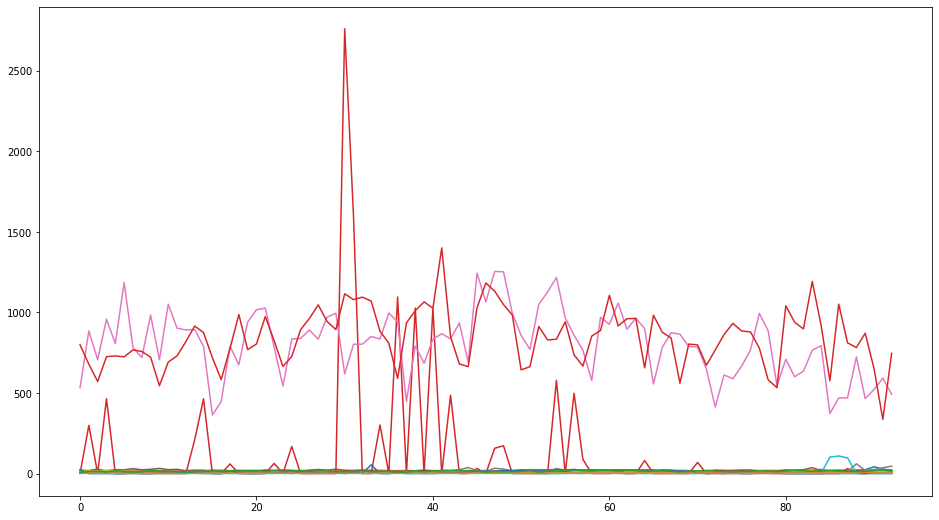

In [ ]:
concentración2019 = df['2019-05-01' : '2019-08-01']
plt.plot(concentración2019.values)
concentración202 = df['2020-05-01' : '2020-08-01']
plt.plot(concentración202.values)

# ¿Cómo hacer pronóstico de series temporales?
#Una vez que tenemos confirmado que nuestra serie es estacionaria, podemos hacer pronóstico. Existen diversos métodos para hacer pronóstico. En nuestro caso, las concetración de PM2_5 parecen comportarse similares en algunos periodos del año, pero presenta diferencias muy marcadas para otros periodos, con lo cual un método sencillo si por ejemplo quisiéramos proveer la concentración de PM2_5 que se tiene para un periodo determinado, sería decir “Si en 2019 en noviembre la concentración promedio de PM2_5  es de 13.38 microgramos por metro cúbico, pronostico que en diciembre será similar”. Otro método muy utilizado en estadística es el llamado ARIMA (enlace: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/). Aquí un gráfica que encontré en Twitter sobre la evolución del Forecasting:

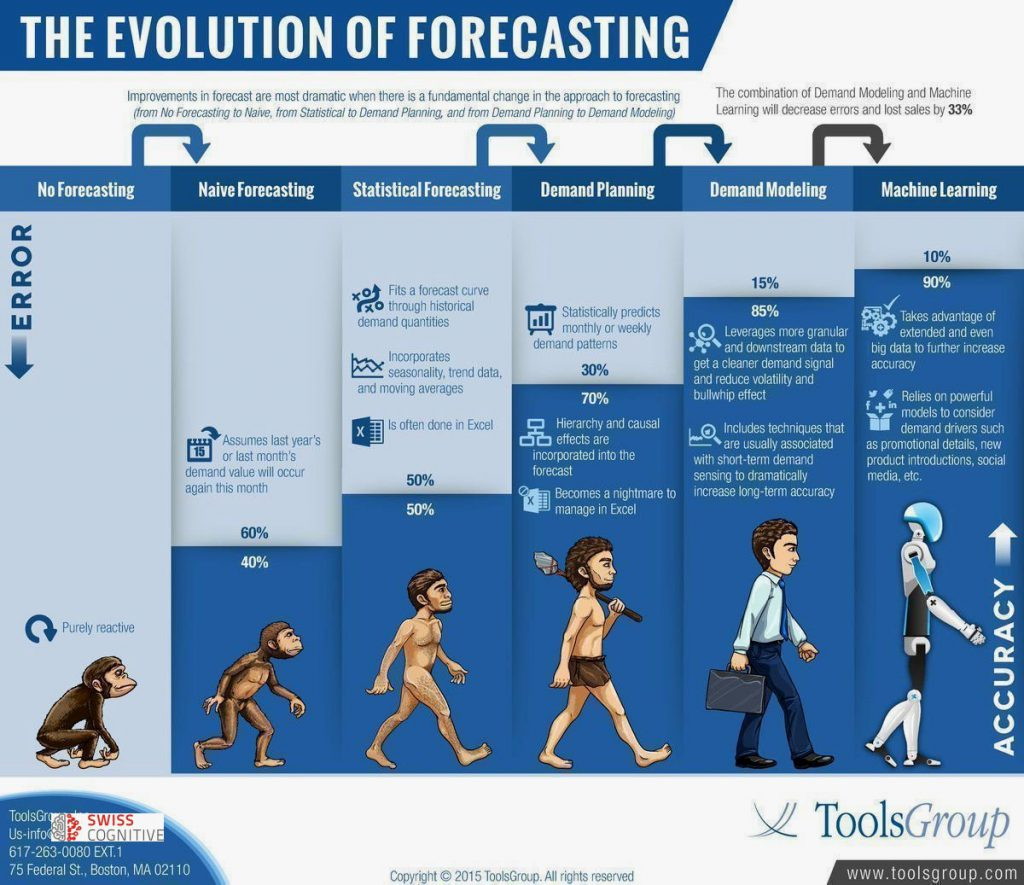

# En esta oportunidad utilizaremos Machine Learning: una red neuronal para hacer el pronóstico. Curiosamente crear esta red es algo relativamente sencillo, y en poco tiempo estaremos usando un modelo de lo más moderno para hacer el pronóstico.

# Pronóstico de Concentración Diarias de PM2_5 con Redes Neuronal: Usaremos una arquitectura sencilla de red neuronal FeedForward (también llamada MLP por sus siglas Multi-Layered Perceptron), con pocas neuronas y como método de activación tangente hiperbólica pues entregaremos valores transformados entre -1 y 1. Si aún no manejas del todo bien redes Neuronales, te recomiendo repasar rápidamente estos artículos y luego continuar con el ejercicio:

* https://www.aprendemachinelearning.com/aprendizaje-profundo-una-guia-rapida/

* https://www.aprendemachinelearning.com/una-sencilla-red-neuronal-en-python-con-keras-y-tensorflow/

* https://www.aprendemachinelearning.com/crear-una-red-neuronal-en-python-desde-cero/

* https://www.aprendemachinelearning.com/breve-historia-de-las-redes-neuronales-artificiales/

# Preparamos los datos: Este puede que sea uno de los pasos más importantes de este ejercicio.

# Lo que haremos es alterar nuestro flujo de entrada del archivo csv que contiene una columna con las unidades despachadas, y lo convertiremos en varias columnas. ¿Y porqué hacer esto? En realidad lo que haremos es tomar nuestra serie temporal y la convertiremos en un “problema de tipo supervisado“ para poder alimentar nuestra red neuronal y poder entrenarla con backpropagation (“como es habitual”). Para hacerlo, debemos tener unas entradas y unas salidas para entrenar al modelo.

# Lo que haremos -en este ejemplo- es tomar los 7 días previos para “obtener” el octavo. Podríamos intentar entrenar a la red con 2, ó 3 días. O también podríamos tener 1 sola salida, ó hasta “atrevernos” intentar predecir más de un “día futuro”. Eso lo dejo a ustedes cómo actividad extra. Pero entonces quedémonos con que:

# Entradas: serán “7 columnas” que representan las concentraciones de PM2_5 en microgramos por metros cúbico de los 7 días anteriores.
# Salida: El valor del “8vo día”. Es decir, la  concentración de PM2_5 (en microgramos por metro cúbico) de ese día.
#Para hacer esta transformación usaré una función llamada series_to_supervised(). (La verás en el código, a continuación)

#Antes de usar la función, utilizamos el MinMaxScaler para transformar el rango de nuestros valores entre -1 y 1 (pues sabemos que a nuestra red neuronal, le favorece para realizar los cálculos).

#Entonces aqui vemos cómo queda nuestro set de datos de entrada.

In [ ]:
# convert series to supervised learning
PASOS = 7
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    Variable_PM2_5 = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(Variable_PM2_5.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(Variable_PM2_5.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Variable_PM2_5.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()


var1(t-7)  var1(t-6)  var1(t-5)  ...  var1(t-2)  var1(t-1)   var1(t)
7   -0.590444  -0.658703  -0.795222  ...  -0.556314  -0.829351 -0.317406
8   -0.658703  -0.795222  -0.522184  ...  -0.829351  -0.317406 -0.522184
9   -0.795222  -0.522184  -0.726962  ...  -0.317406  -0.522184 -0.829351
10  -0.522184  -0.726962  -0.556314  ...  -0.522184  -0.829351 -0.556314
11  -0.726962  -0.556314  -0.829351  ...  -0.829351  -0.556314 -0.726962

[5 rows x 8 columns]

#Usaremos como entradas las columnas encabezadas como var1(t-7) a (t-1) y nuestra salida (lo que sería el valor “Y” de la función) será el var1(t) -la última columna-.

# Si se tienen dudas sobre los conjuntos de Trains, Tes y Validación, se puede leer este articulo: 
* https://www.aprendemachinelearning.com/sets-de-entrenamiento-test-validacion-cruzada/

# Creamos la Red Neuronal Artificial
# Antes de crear la red neuronal, subdividiremos nuestro conjunto de datos en train y en test. ATENCIÓN, algo importante de este procedimiento, a diferencia de otros problemas en los que podemos “mezclar” los datos de entrada, es que en este caso nos importa mantener el orden en el que alimentaremos la red. Por lo tanto, haremos una subdivisión de los primeros 567 días consecutivos para entrenamiento de la red y los siguientes 30 para su validación. Esta es una proporción que elegí yo, y que me pareció conveniente, pero definitivamente, puede no ser la óptima (queda propuesto al lector, variar esta proporción por ejemplo a 80-20 y comparar resultados )

In [ ]:
# split into train and test sets
values = reframed.values
n_train_days = 315+289 - (30+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(567, 1, 7) (567,) (29, 1, 7) (29,)


# Hemos transformado la entrada en un arreglo con forma (567,1,7) esto al castellano significa algo así como “567 entradas con vectores de 1×7”.

# La arquitectura de la red neuronal será:

* Entrada 7 inputs, como dijimos antes
* 1 capa oculta con 7 neuronas (este valor lo escogí yo, pero se puede variar)
* La salida será 1 sola neurona
*Como función de activación utilizamos tangente hiperbólica puesto que utilizaremos valores entre -1 y 1.
* Utilizaremos como optimizador Adam y métrica de pérdida (loss) Mean Absolute Error
* Como la predicción será un valor continuo y no discreto, para calcular el Acuracy utilizaremos Mean Squared Error y para saber si mejora con el entrenamiento se debería ir reduciendo con las EPOCHS.

In [ ]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model
 

# Entrenamiento y Resultados
# Veamos cómo se comporta nuestra máquina al cabo de 40 épocas.

In [ ]:
EPOCHS=40
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 7)              56        
_________________________________________________________________
flatten (Flatten)            (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
81/81 [==============================] - 1s 4ms/step - loss: 0.1575 - mse: 0.0457 - val_loss: 0.2814 - val_mse: 0.2556
Epoch 2/40
81/81 [==============================] - 0s 2ms/step - loss: 0.1492 - mse: 0.0417 - val_loss: 0.2699 - val_mse: 0.2465
Epoch 3/40
81/81 [==============================] - 0s 2ms/step - loss: 0.1454 - mse: 0.0392 - val_loss: 0.2607 - val_mse: 0.2380


# Epoch 40/40: 81/81 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.0268 - val_loss: 0.2066 - val_mse: 0.1770

# Visualizamos al conjunto de validación (recordemos que eran 30 días):

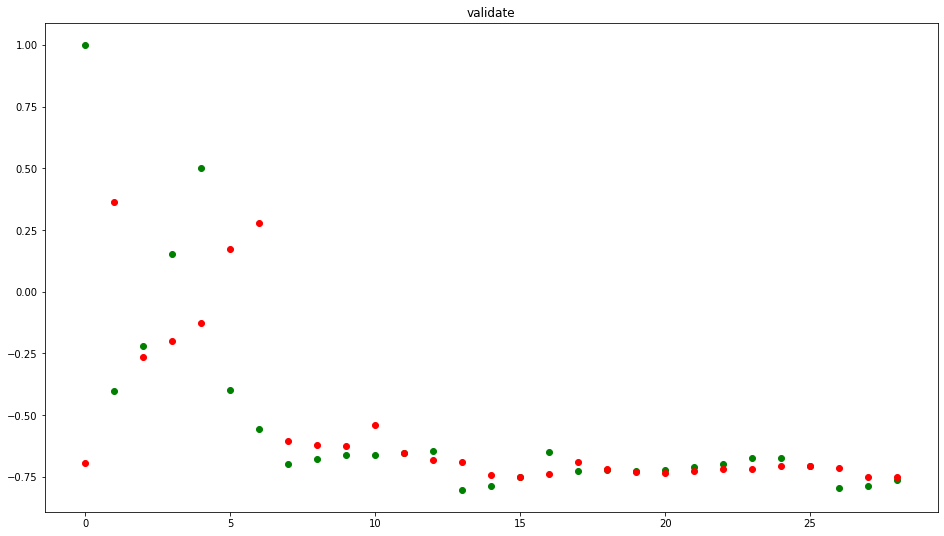

In [ ]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

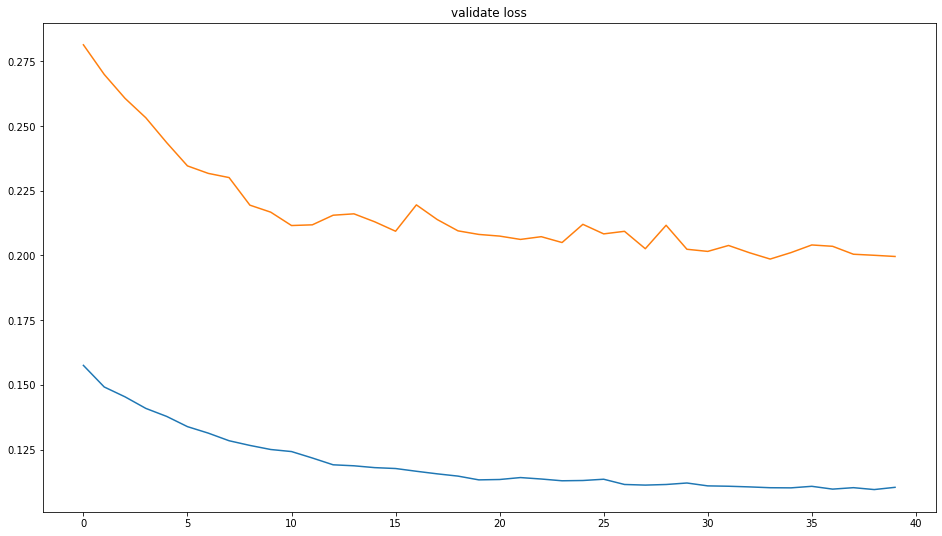

In [ ]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.plot(history.history['val_loss'])
plt.title('validate loss')
plt.show()

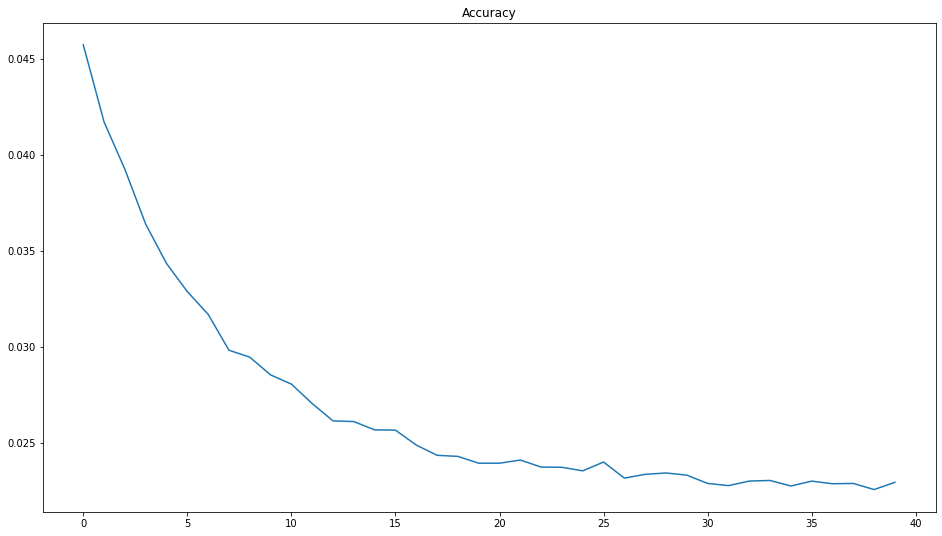

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['mse'])
plt.show()

In [ ]:
compara = pd.DataFrame(np.array([y_val, [x[0] for x in results]])).transpose()
compara.columns = ['real', 'prediccion']

inverted = scaler.inverse_transform(compara.values)

compara2 = pd.DataFrame(inverted)
compara2.columns = ['real', 'prediccion']
compara2['diferencia'] = compara2['real'] - compara2['prediccion']
compara2.head()

real  prediccion  diferencia
0  60.600002   10.992293   49.607708
1  19.500000   41.975952  -22.475952
2  24.799999   23.499340    1.300659
3  35.799999   25.457903   10.342096
4  46.000000   27.565275   18.434725

In [ ]:
compara2.describe()

real  prediccion  diferencia
count  29.000000   29.000000   29.000000
mean   15.506897   15.353056    0.153840
std    12.126386    9.553043   12.460081
min     7.800001    9.256733  -24.407223
25%     9.999999   10.037665   -1.720840
50%    11.400000   10.992293   -0.071546
75%    12.400001   13.546909    0.873383
max    60.600002   41.975952   49.607708

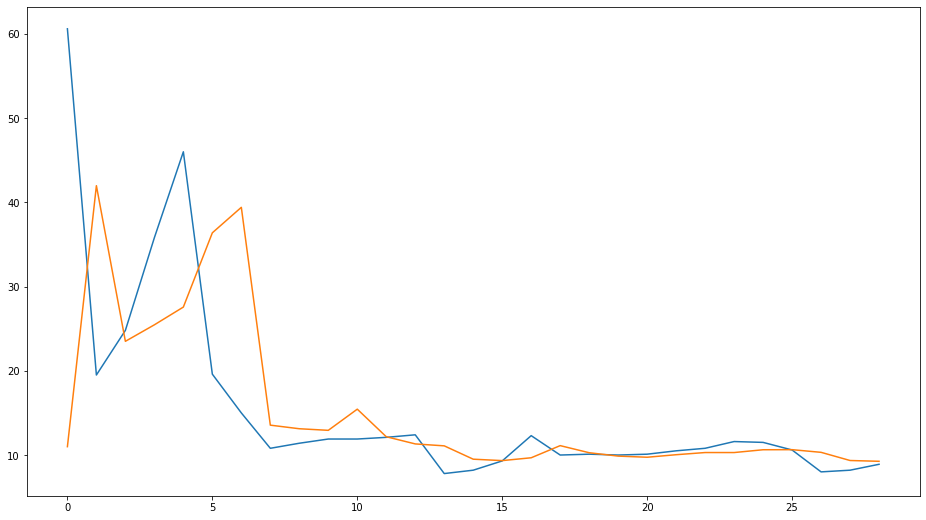

In [ ]:
compara2['real'].plot()
compara2['prediccion'].plot()

In [ ]:
compara2.describe()

real  prediccion  diferencia
count  29.000000   29.000000   29.000000
mean   15.506897   15.353056    0.153840
std    12.126386    9.553043   12.460081
min     7.800001    9.256733  -24.407223
25%     9.999999   10.037665   -1.720840
50%    11.400000   10.992293   -0.071546
75%    12.400001   13.546909    0.873383
max    60.600002   41.975952   49.607708

# En la gráfica vemos que los puntitos verdes intentan aproximarse a los rojos. Cuanto más cerca ó superpuestos mejor. TIP: Si aumentamos la cantidad de EPOCHS mejora cada vez más.
#Veamos y comparemos también cómo disminuye el LOSS tanto en el conjunto de train como el de Validate, esto es bueno ya que indica que el modelo está aprendiendo. A su vez pareciera no haber overfitting, pues las curvas de train y validate son distintas.

# Pronóstico de concentración de PM2_5 futuras
# Ahora que tenemos nuestra red y -suponiendo que realizamos los 7 pasos del ML– la damos por buena, probaremos a realizar una nueva predicción, en este caso, usaremos los últimos días de noviembre 2019 para calcular la primer semana de diciembre. Veamos:

In [ ]:
ultimosDias = Variable_PM2_5['2019-11-16':'2019-11-30']
ultimosDias

PM2_5
Fecha            
2019-11-16   11.0
2019-11-17    8.8
2019-11-18   14.4
2019-11-19   20.6
2019-11-20   18.1
2019-11-21   16.5
2019-11-22   17.4
2019-11-23   15.5
2019-11-24   14.3
2019-11-25   10.7
2019-11-26   17.1
2019-11-27   15.6
2019-11-28   14.3
2019-11-29   13.2
2019-11-30   10.4

# Y ahora seguiremos el mismo preprocesado de datos que hicimos para el entrenamiento: escalando los valores, llamando a la función series_to_supervised pero esta vez sin incluir la columna de salida “Y” pues es la que queremos hallar. Por eso, verán en el código que hacemos drop() de la última columna.

In [ ]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

var1(t-7)  var1(t-6)  var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)
7   -0.627119  -1.000000  -0.050848   1.000000   0.576271   0.305085   0.457627
8   -1.000000  -0.050848   1.000000   0.576271   0.305085   0.457627   0.135593
9   -0.050848   1.000000   0.576271   0.305085   0.457627   0.135593  -0.067797
10   1.000000   0.576271   0.305085   0.457627   0.135593  -0.067797  -0.677966
11   0.576271   0.305085   0.457627   0.135593  -0.067797  -0.677966   0.406780
12   0.305085   0.457627   0.135593  -0.067797  -0.677966   0.406780   0.152542
13   0.457627   0.135593  -0.067797  -0.677966   0.406780   0.152542  -0.067797

# De este conjunto “ultimosDias” tomamos sólo la última fila, pues es la que correspondería a la última semana de noviembre y la dejamos en el formato correcto para la red neuronal con reshape:

In [ ]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[ 0.45762682,  0.13559294, -0.06779671, -0.67796636,
          0.40677953,  0.15254235, -0.06779671]],

       [[ 0.13559294, -0.06779671, -0.67796636,  0.40677953,
          0.15254235, -0.06779671, -0.2542374 ]]], dtype=float32)

# Ahora crearemos una función para ir “rellenando” el desplazamiento que hacemos por cada predicción. Esto es porque queremos predecir los 7 primeros días de diciembre. Entonces para el 1 de diciembre, ya tenemos el set con los últimos 7 días de noviembre. Pero para pronosticar el 2 de diciembre necesitamos los 7 días anteriores que INCLUYEN al 1 de diciembre y ese valor, lo obtenemos en nuestra predicción anterior. Y así hasta el 7 de diciembre.


In [ ]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[ 0.45762682  0.13559294 -0.06779671 -0.67796636  0.40677953
    0.15254235 -0.06779671]]

 [[ 0.13559294 -0.06779671 -0.67796636  0.40677953  0.15254235
   -0.06779671 -0.2542374 ]]]
[[[ 0.13559294 -0.06779671 -0.67796636  0.40677953  0.15254235
   -0.06779671  0.03181545]]

 [[ 0.13559294 -0.06779671 -0.67796636  0.40677953  0.15254235
   -0.06779671 -0.2542374 ]]]
[[[-0.06779671 -0.67796636  0.40677953  0.15254235 -0.06779671
    0.03181545  0.04485151]]

 [[ 0.13559294 -0.06779671 -0.67796636  0.40677953  0.15254235
   -0.06779671 -0.2542374 ]]]
[[[-0.67796636  0.40677953  0.15254235 -0.06779671  0.03181545
    0.04485151 -0.2040322 ]]

 [[ 0.13559294 -0.06779671 -0.67796636  0.40677953  0.15254235
   -0.06779671 -0.2542374 ]]]
[[[ 0.40677953  0.15254235 -0.06779671  0.03181545  0.04485151
   -0.2040322   0.1252888 ]]

 [[ 0.13559294 -0.06779671 -0.67796636  0.40677953  0.15254235
   -0.06779671 -0.2542374 ]]]
[[[ 0.15254235 -0.06779671  0.03181545  0.04485151 -0.2040322
    0.12

# Ya casi lo tenemos… Ahora las predicciones están en el dominio del -1 al 1 y nosotros lo queremos en nuestra escala “real” de unidades de microgramos por metro cúbico. Entonces vamos a “re-transformar” los datos con el objeto “scaler” que creamos antes.

In [ ]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[14.88771216],
       [14.9646249 ],
       [13.49621105],
       [15.43920488],
       [14.85042803],
       [14.51452714],
       [14.87644724]])

# Ya podemos crear un nuevo DataFrame Pandas por si quisiéramos guardar un nuevo csv con el pronóstico. Y lo visualizamos.

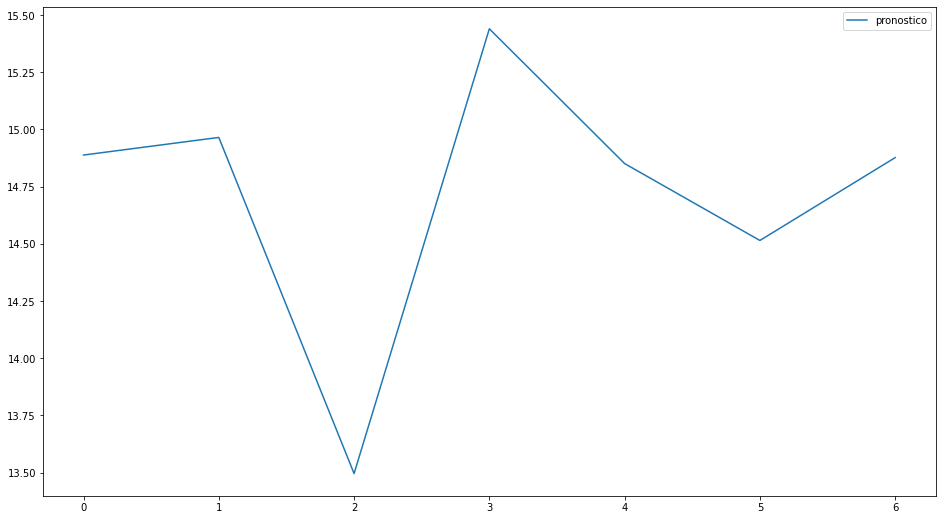

In [ ]:
prediccion1SemanaDiciembre = pd.DataFrame(inverted)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre.plot()
prediccion1SemanaDiciembre.to_csv('pronostico.csv')

# A partir de los últimos 7 días de noviembre 2019 y utilizando nuestra red neuronal, hicimos el siguiente pronóstico de concentración de PM2_5 en microgramos por metro cúbico para la primer semana de diciembre.

#Conclusiones y propuesta al lector 
#Durante este nuevo capítulo del aprendizaje automático, diferenciamos lo que son las Series Temporales y su predicción de los problemas de Regresión. Aprovechamos la capacidad de las redes neuronales de generalizar y lograr predecir la concentración de PM2_5 futuras. Uno de los pasos más importantes, al realizar el pre procesado, consiste en convertir nuestra serie en un modelo de aprendizaje supervisado, donde tenemos valores de entrada y salida, para poder entrenar la red. Y finalizamos realizando pronóstico de una semana utilizando la red neuronal creada.

#Propongo al lector hacer diversas pruebas para mejorar las predicciones, alterando parámetros del ejercicio:

* Variar la cantidad de EPOCHS
* Probar otro optimizador distinto a Adam, ó configurar valores distintos de Learning Rate.
* Cambiar la arquitectura de la Red Neuronal:
* Cambiar la cantidad de Neuronas de la capa oculta.
* Agregar más capas ocultas
* Probar utilizando más de 7 días previos para predecir. O probar con menos días.
* Se puede probar de intentar predecir más de 1 día por vez (sin iterar el resultado como hice con la función agregarNuevoValor() )
* En el próximo artículo (YA DISPONIBLE) retoma este ejercicio pero aplicando Embeddings que puede mejorar la precisión de las predicciones poniendo en juego el día de la semana y mes que estamos pronosticando, considerándolos como datos adicionales de entrada a la red neuronal para preservar mejor la estacionalidad.

# PARTE 2: Pronóstico de series temporales en Python. Mejora del modelo de series temporales con Múltiples Variables y Embeddings

# Mejora del modelo de Series Temporales con Múltiples Variables y Embeddings. Este artículo es la continuación del trabajo anterior “Pronóstico de Series Temporales con Redes Neuronales en Python” en donde vimos cómo a partir de un archivo de entrada con las concentraciones de PM2_5 emitidos en Manizales durante años anteriores, podíamos estimar las concentraciones de la próxima semana. Continuaremos a partir de ese modelo y haremos propuestas para mejorar la predicción.

# Breve Repaso de lo que hicimos anteriormente:

# En el modelo corrido anteriormente creamos una Red Neuronal MLP (Multilayered Perceptron) feedforward de pocas capas, y el mayor trabajo que hicimos fue en los datos de entrada. Puesto que sólo tetomamos dos elementos de la base de datos Fecha y PM2_5 lo que hicimos fue transformar esa entrada en un “problema de aprendizaje supervisado“. Para ello, creamos un “nuevo archivo” de entrada con 7 columnas en donde poníamos la concentración de PM2_5 en los 7 días anteriores y de salida la concentración de PM2_5 en “la fecha actual”. De esa manera alimentamos la red y ésta fue capaz de realizar pronósticos aceptables. Sólo utilizamos la columna de concentración de PM2_5 en microgramos por metro cubico. Pero no utilizamos la columna de fecha. ¿Podría ser la columna de fecha un dato importante? ¿podría mejorar nuestra predicción de concentración de PM2_5?

# Mejoras al modelo de Series Temporales: Esto es lo que haremos: Se proponen 2 nuevos modelos con Redes Neuronales Feedforward para intentar mejorar los pronósticos de concentración de PM2_5 en el centro de la ciudad de Manizales:

* Un primer modelo tomando la fecha como nueva variable de entrada valiosa y que aporta datos.
* Un segundo modelo también usando la fecha como variable adicional, pero utilizándola con Embeddings… y a ver si mejora el pronóstico.

# Por lo tanto explicaremos lo qué son los embeddings utilizados en variables categóricas (se utiliza mucho en problemas de Procesamiento del Lenguaje Natural NLP para modelar).

# Para estos modelos propuestos haremos la transformación a “problema de aprendizaje supervisado. Para ello usaremos la misma función series_to_supervised() de la web machinelearningmastery como en el ejercicio anterior.

# Primer Mejora: Serie Temporal de múltilples Variables. Puede que el “ejemplo clásico” para comprender lo que son las Series Temporales de Múltiples Variables sea el pronóstico del tiempo, en donde tenemos varias “columnas de entrada” con la temperatura, la presión atmosférica, humedad. Con esas tres variables tendremos una mejor predicción de “la temperatura de mañana” que si tan sólo usásemos una sola feature.

# Usar Fecha como variable de entrada: Como solamente tenemos un dato de entrada (la concentración de PM2_5 en el día), intentaremos enriquecer a la red con más entradas. Para ello, usaremos la fecha. ¿Pero cómo? Bueno, aprovecharemos que podemos saber cada día que hubo emisiones de PM2_5 si fue un lunes, martes… por ejemplo algunos puntos de la ciudad de Manizales presentan una mayor o menor concentración de material particulado PM2_5 los viernes y sábados. También, como vimos que en cuanto a las condiciones climatológicas, no se evidencia una correlación entre las variables y la concentración de PM2_5, la red neuronal debería percatarse de eso y “mejorar su puntería” entendiendo con mayor precisión que ocurrira en los meses 7 y 8 (¿lo hará..?). No agregaré los años, pues sólo tenemos 2019 y 2020 (muy pocos), pero si tu cuentas con un dataset con muchos años, sería bueno agregar como entrada también los años.

# En Limpio: Usaremos el día como variable categórica con valores de 0 a 6 indicando día de semana y usaremos el número de mes como otra variable categórica. La “intuición” es que la red <<entenderá>> las estacionalidades dadas entre semana y mensuales.

# Segunda mejora: Embeddings en variables categóricas: Bien, para el segundo modelo, utilizaremos embeddings en las variables categóricas, es decir, en la columna de día y de mes. Los valores de día van del 0 al 6 representando los días de la semana. Pero no quiere decir que el día 6 “vale” más que el día 0. Son identificadores. No tendría sentido decir que jueves es mayor que domingo. Sin embargo la red neuronal esto no lo sabe y podría interpretar erróneamente esos valores (categóricos)… Con los meses lo mismo; van del 1 al 12 pero no quiere decir que “diciembre tenga mayor concentración de PM2_5 que  que agosto”. Y de hecho, sabemos en la práctica para este ejercicio, que realmente en jlos meses de mayor trafico vehicular debido a la demanda estudiantil, cuando más aumenta la concentración de PM2_5. Para intentar resolver esta problemática, es que aparecen los Embeddings.

# ¿Qué son los Embeddings? ¿por qué? ¿para qué?: La traducción al español de “Embed” es Incrustar… y esto a simple vista no nos ayuda mucho. Google lo traduce en uno de sus tutoriales como “incorporaciones“. Los embeddings son una manera de dar valoración útil a datos categóricos. Para ello asignaremos una profundidad a cada “identificador”, es decir un vector con valores continuos inicialmente aleatorios. Esos valores se ajustarán con backpropagation al igual que nuestra red neuronal. Y finalmente nuestros datos categóricos quedan enriquecidos y dejan de ser “lunes” para ser unos vectores con valores que “significan algo”. ¿Qué significan? para simplificar e intentar entenderlo podemos decir que esos vectores “acercan identificadores similares entre sí y distancia a los opuestos”. Un ejemplo: cuando se utiliza en Natural Language Processing (NLP) con un gran número de palabras, los Embeddings logran hacer que palabras sobre sentimientos positivos -“alegría”,”felicidad”- queden cercanas pero distanciadas de las que significan sentimientos negativos “odio”,”tristeza”.

# Hay un caso también muy usado llamado: Filtrado colaborativo en el cual se crea un motor de recomendaciones de películas. En ese ejemplo, se sitúan en un espacio vectorial las películas infantiles en extremo y las de adultos en otro. A su vez, otra coordenada indica si la película es “más comercial/taquillera” ó más “artística”.

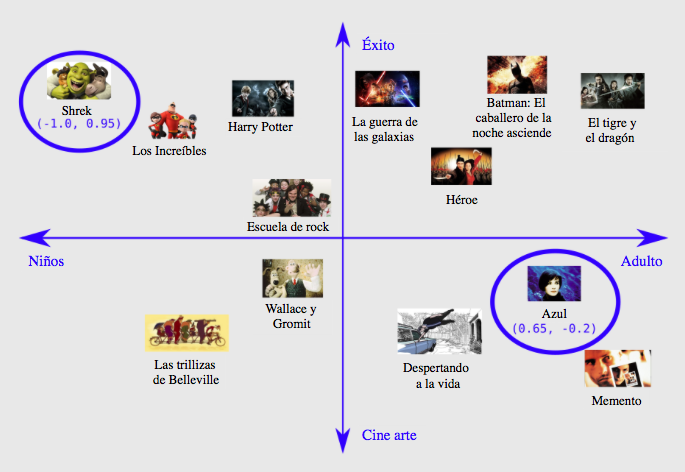


# En este caso “simplificado” los Embeddings se pueden ver como vectores de coordenadas (x,y) que acercan películas similares en 2 dimensiones y a su vez quedan distanciadas de Identificadores opuestos.

# Sobre la dimensionalidad de los Embeddings. Es bueno usar muchas dimensiones (profundidad) para modelar nuestras variables categóricas. Pero ojo!, si tiene demasiadas, puede ocurrir overfitting. Entonces habrá que hacer prueba y error. Hay una regla que dice que hay que usar “una cuarta parte” del tamaño de la variable categórica: si tenemos 100 identificadores, usaremos como profundidad 25. En el curso de Fast.ai recomiendan un máximo de 50 ó “la cantidad de elementos categóricos más uno, dividido dos” (si es menor a 50). Pero siempre dependerá del caso.

# Conclusión de Embeddings: Al asignarle vectores con valor numérico continuo a entradas categóricas , estos terminan funcionando como “una mini red neuronal” dentro de la red principal. Aprenden con backpropagation. Y resuelven como valores continuos esos identificadores discretos, acentuando su valor intrínseco.

# Una ventaja de usar Embeddings es que se pueden reutilizar. Una vez entrenados podemos guardarlos para utilizarlos en otra red. Gracias a esto es que encontramos archivos de Embeddings con millones de palabras “ya entrenadas” por Google, listos para descargar y usar.

# Usaremos Keras y Tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Cargamos el dataset
#https://docs.google.com/spreadsheets/d/1rJkZRZBdGzlo4Y7IdJh9hO3IGoF0dBBh/edit?usp=sharing&ouid=101417461973163795592&rtpof=true&sd=true
url_2 = 'https://drive.google.com/uc?id=1rJkZRZBdGzlo4Y7IdJh9hO3IGoF0dBBh'
df_2 = pd.read_excel(url_2,  parse_dates=[0], header=None,index_col=0, names=['fecha','PM2_5'])
df_2.head()

PM2_5
fecha            
2019-01-01   14.0
2019-01-02   12.0
2019-01-03    8.0
2019-01-04   16.0
2019-01-05   10.0

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 603 entries, 2019-01-01 to 2020-08-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2_5   603 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


In [ ]:
df_2['PM2_5'] = df_2.PM2_5.astype('int64')

In [ ]:
# Cargamos Datos Categóricos: Día y Mes
df_2['weekday']=[x.weekday() for x in df_2.index]
df_2['month']=[x.month for x in df_2.index]
df_2.head()

PM2_5  weekday  month
fecha                            
2019-01-01     14        1      1
2019-01-02     12        2      1
2019-01-03      8        3      1
2019-01-04     16        4      1
2019-01-05     10        5      1

In [ ]:
df_2.describe()


PM2_5     weekday       month
count  603.000000  603.000000  603.000000
mean    12.981758    2.996683    5.698176
std      6.001495    2.001658    3.205339
min      2.000000    0.000000    1.000000
25%      9.000000    1.000000    3.000000
50%     12.000000    3.000000    5.000000
75%     16.000000    5.000000    8.000000
max     60.000000    6.000000   12.000000

# Preprocesado de los datos

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df_2 = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df_2.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df_2.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
PASOS=7

# load dataset
values = df_2['PM2_5'].values

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)

df_2['scaled'] = scaled
scaledMerge=df_2.drop('PM2_5',axis=1)
#print(scaledMerge.values)

# frame as supervised learning
reframed = series_to_supervised(scaledMerge, PASOS, 1)
reframed.head()

var1(t-7)  var2(t-7)  var3(t-7)  ...  var1(t)  var2(t)   var3(t)
fecha                                        ...                            
2019-01-08        1.0        1.0  -0.586207  ...        1        1 -0.310345
2019-01-09        2.0        1.0  -0.655172  ...        2        1 -0.517241
2019-01-10        3.0        1.0  -0.793103  ...        3        1 -0.827586
2019-01-11        4.0        1.0  -0.517241  ...        4        1 -0.551724
2019-01-12        5.0        1.0  -0.724138  ...        5        1 -0.724138

[5 rows x 24 columns]

# Dividimos el set de entrenamiento

In [ ]:
#newReframed=reframed.drop(['var2(t)','var3(t)', 'var4(t)', 'var5(t)', 'var6(t)'],axis=1) #eliminar var 2, 3 ,4 5 y 6
newReframed=reframed.drop(['var1(t)','var2(t)'],axis=1)
print(newReframed.shape)
newReframed.head()

(596, 22)


var1(t-7)  var2(t-7)  var3(t-7)  ...  var2(t-1)  var3(t-1)   var3(t)
fecha                                        ...                                
2019-01-08        1.0        1.0  -0.586207  ...        1.0  -0.827586 -0.310345
2019-01-09        2.0        1.0  -0.655172  ...        1.0  -0.310345 -0.517241
2019-01-10        3.0        1.0  -0.793103  ...        1.0  -0.517241 -0.827586
2019-01-11        4.0        1.0  -0.517241  ...        1.0  -0.827586 -0.551724
2019-01-12        5.0        1.0  -0.724138  ...        1.0  -0.551724 -0.724138

[5 rows x 22 columns]

In [ ]:
# split into train and test sets
values = newReframed.values
n_train_days = 315+289 - (30+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

#365 238
#315+289 el que estaba antes

(567, 1, 21) (567,) (29, 1, 21) (29,)


# Creamos el Modelo de Red Neuronal

#Utilizaremos una Red Feedforward

# Como entradas son 21 columnas (7 pasos por 3 variables; en el ejemplo)

In [ ]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1, PASOS*3),activation='tanh'))
    #model.add(Dense(PASOS, input_shape=(1,PASOS*6),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

# Entrenamos nuestra maquina

In [ ]:
EPOCHS=40

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1, 7)              154       
_________________________________________________________________
flatten_1 (Flatten)          (None, 7)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
81/81 [==============================] - 1s 4ms/step - loss: 0.1960 - mse: 0.0688 - val_loss: 0.2189 - val_mse: 0.1793
Epoch 2/40
81/81 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.0419 - val_loss: 0.2118 - val_mse: 0.1745
Epoch 3/40
81/81 [==============================] - 0s 2ms/step - loss: 0.1464 - mse: 0.0383 - val_loss: 0.2094 - val_mse: 0.1

# Visualizamos Resultados

29


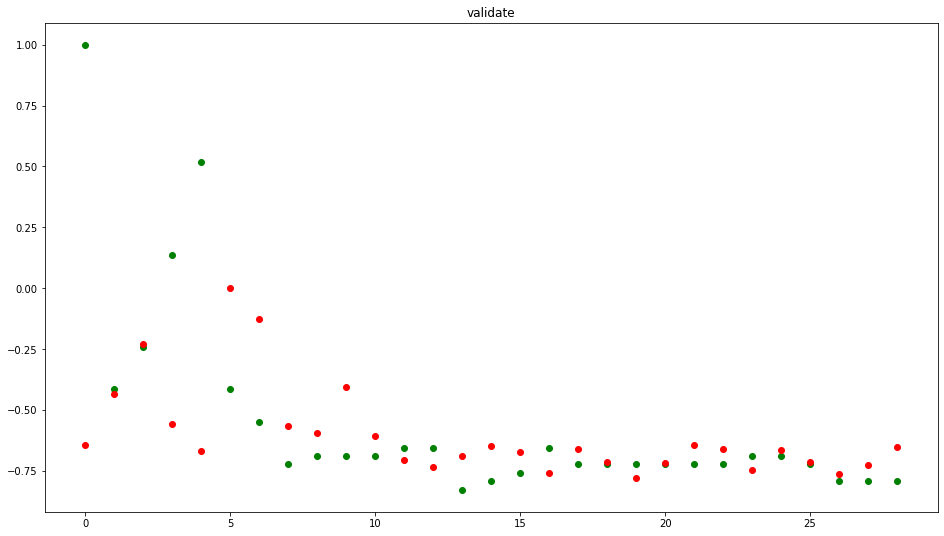

In [ ]:
results=model.predict(x_val)
print( len(results) )
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

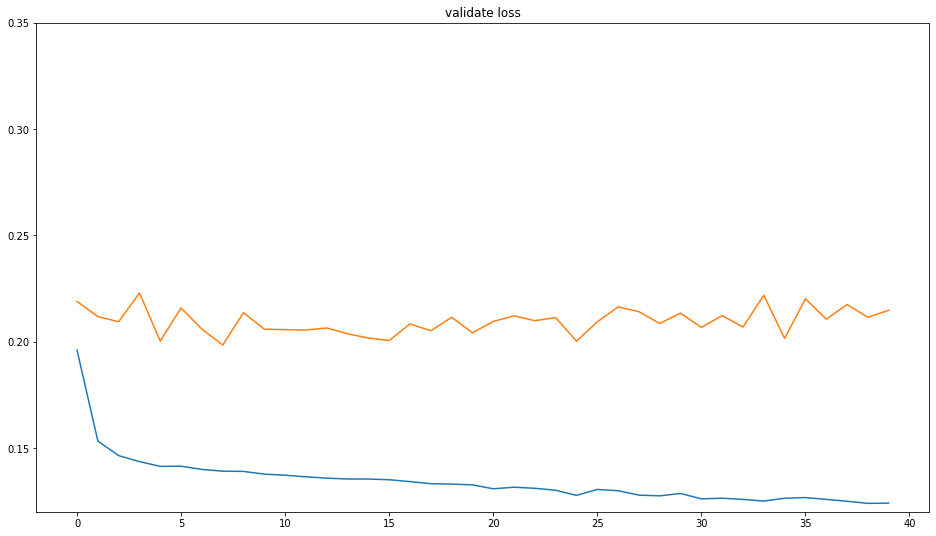

In [ ]:
plt.ylim(0.12, 0.35)
plt.plot(history.history['loss'])
plt.title('loss')
plt.plot(history.history['val_loss'])
plt.title('validate loss')
plt.show()

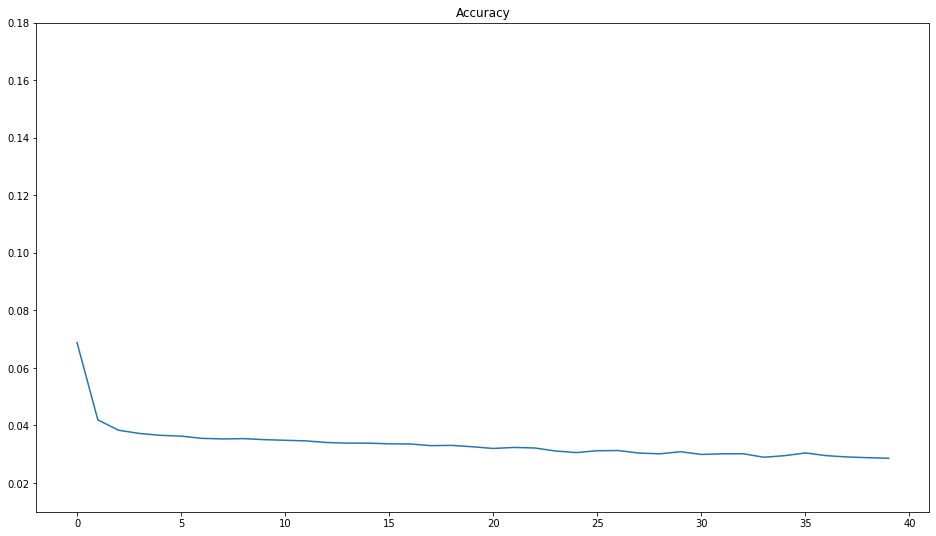

In [ ]:
plt.ylim(0.01, 0.18)
plt.title('Accuracy')
plt.plot(history.history['mse'])
plt.show()

In [ ]:
compara = pd.DataFrame(np.array([y_val, [x[0] for x in results]])).transpose()
compara.columns = ['real', 'prediccion']

inverted = scaler.inverse_transform(compara.values)

compara2 = pd.DataFrame(inverted)
compara2.columns = ['real', 'prediccion']
compara2['diferencia'] = compara2['real'] - compara2['prediccion']
compara2.head(10)

real  prediccion  diferencia
0  59.999998   12.262993   47.737005
1  19.000000   18.382080    0.617920
2  23.999999   24.314760   -0.314761
3  35.000000   14.786009   20.213991
4  46.000001   11.586194   34.413807
5  19.000000   31.064300  -12.064300
6  14.999999   27.266958  -12.266959
7  10.000000   14.633706   -4.633705
8  11.000001   13.711631   -2.711630
9  11.000001   19.220772   -8.220771

In [ ]:
compara2.describe()

real  prediccion  diferencia
count  29.000000   29.000000   29.000000
mean   15.068966   13.495443    1.573523
std    12.103515    5.536257   12.383805
min     7.000000    8.391753  -12.266959
25%    10.000000   10.302127   -2.711630
50%    11.000001   11.784448   -0.809352
75%    12.000000   13.711631    1.471346
max    59.999998   31.064300   47.737005

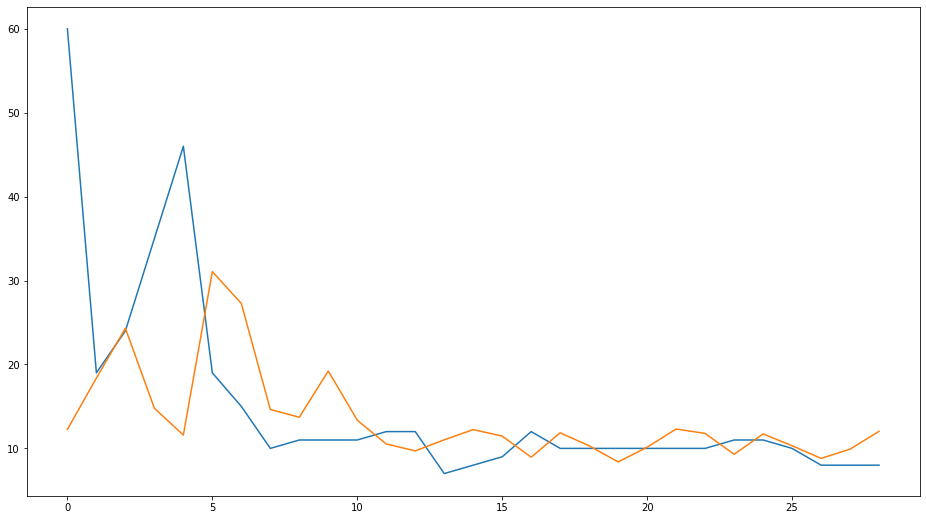

In [ ]:
compara2['real'].plot()
compara2['prediccion'].plot()

# Pronóstico
#A partir de la última semana de noviembre 2018, intentaremos predecir la primer semana de diciembre.

In [ ]:
ultimosDias = df_2['2019-11-16':'2019-11-30']
ultimosDias

PM2_5  weekday  month    scaled
fecha                                      
2019-11-16     11        5     11 -0.689655
2019-11-17      8        6     11 -0.793103
2019-11-18     14        0     11 -0.586207
2019-11-19     20        1     11 -0.379310
2019-11-20     18        2     11 -0.448276
2019-11-21     16        3     11 -0.517241
2019-11-22     17        4     11 -0.482759
2019-11-23     15        5     11 -0.551724
2019-11-24     14        6     11 -0.586207
2019-11-25     10        0     11 -0.724138
2019-11-26     17        1     11 -0.482759
2019-11-27     15        2     11 -0.551724
2019-11-28     14        3     11 -0.586207
2019-11-29     13        4     11 -0.620690
2019-11-30     10        5     11 -0.724138

# Preparamos los datos para Test

In [ ]:
scaledMerge=ultimosDias.drop('PM2_5',axis=1)
print(scaledMerge.values)

# frame as supervised learning
reframed = series_to_supervised(scaledMerge, PASOS, 1)
newReframed=reframed.drop(['var1(t)','var2(t)','var3(t)'],axis=1)
newReframed.head(7)

[[ 5.         11.         -0.68965518]
 [ 6.         11.         -0.79310346]
 [ 0.         11.         -0.58620691]
 [ 1.         11.         -0.37931037]
 [ 2.         11.         -0.44827592]
 [ 3.         11.         -0.51724142]
 [ 4.         11.         -0.48275864]
 [ 5.         11.         -0.5517242 ]
 [ 6.         11.         -0.58620691]
 [ 0.         11.         -0.72413796]
 [ 1.         11.         -0.48275864]
 [ 2.         11.         -0.5517242 ]
 [ 3.         11.         -0.58620691]
 [ 4.         11.         -0.62068969]
 [ 5.         11.         -0.72413796]]


var1(t-7)  var2(t-7)  var3(t-7)  ...  var1(t-1)  var2(t-1)  var3(t-1)
fecha                                        ...                                 
2019-11-23        5.0       11.0  -0.689655  ...        4.0       11.0  -0.482759
2019-11-24        6.0       11.0  -0.793103  ...        5.0       11.0  -0.551724
2019-11-25        0.0       11.0  -0.586207  ...        6.0       11.0  -0.586207
2019-11-26        1.0       11.0  -0.379310  ...        0.0       11.0  -0.724138
2019-11-27        2.0       11.0  -0.448276  ...        1.0       11.0  -0.482759
2019-11-28        3.0       11.0  -0.517241  ...        2.0       11.0  -0.551724
2019-11-29        4.0       11.0  -0.482759  ...        3.0       11.0  -0.586207

[7 rows x 21 columns]

In [ ]:
values = newReframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
print(x_test)
ultDiaSemana = newReframed.index[len(newReframed.index)-1].weekday()

(2, 1, 21)
[[[ 4.         11.         -0.48275864  5.         11.
   -0.5517242   6.         11.         -0.58620691  0.
   11.         -0.72413796  1.         11.         -0.48275864
    2.         11.         -0.5517242   3.         11.
   -0.58620691]]

 [[ 5.         11.         -0.5517242   6.         11.
   -0.58620691  0.         11.         -0.72413796  1.
   11.         -0.48275864  2.         11.         -0.5517242
    3.         11.         -0.58620691  4.         11.
   -0.62068969]]]


In [ ]:
def agregarNuevoValor(x_test,nuevoValor,ultDiaSemana):
    for i in range(x_test.shape[2]-3):
        x_test[0][0][i] = x_test[0][0][i+3]
    ultDiaSemana=ultDiaSemana+1
    if ultDiaSemana>6:
        ultDiaSemana=0
    x_test[0][0][x_test.shape[2]-3]=ultDiaSemana
    x_test[0][0][x_test.shape[2]-2]=12
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test,ultDiaSemana

# Pronóstico para la "próxima semana"

In [ ]:
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print('pred',i,x_test)
    x_test,ultDiaSemana=agregarNuevoValor(x_test,parcial[0],ultDiaSemana)
    

pred 0 [[[ 4.         11.         -0.48275864  5.         11.
   -0.5517242   6.         11.         -0.58620691  0.
   11.         -0.72413796  1.         11.         -0.48275864
    2.         11.         -0.5517242   3.         11.
   -0.58620691]]

 [[ 5.         11.         -0.5517242   6.         11.
   -0.58620691  0.         11.         -0.72413796  1.
   11.         -0.48275864  2.         11.         -0.5517242
    3.         11.         -0.58620691  4.         11.
   -0.62068969]]]
pred 1 [[[ 5.         11.         -0.5517242   6.         11.
   -0.58620691  0.         11.         -0.72413796  1.
   11.         -0.48275864  2.         11.         -0.5517242
    3.         11.         -0.58620691  6.         12.
   -0.60651898]]

 [[ 5.         11.         -0.5517242   6.         11.
   -0.58620691  0.         11.         -0.72413796  1.
   11.         -0.48275864  2.         11.         -0.5517242
    3.         11.         -0.58620691  4.         11.
   -0.62068969]]]
pred 

# Re-Convertimos los resultados

In [ ]:
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)
inverted

[array([-0.606519], dtype=float32), array([-0.696812], dtype=float32), array([-0.54717684], dtype=float32), array([-0.604573], dtype=float32), array([-0.62834215], dtype=float32), array([-0.6010867], dtype=float32), array([-0.70053864], dtype=float32)]


array([[13.41095059],
       [10.79245387],
       [15.13187283],
       [13.46738379],
       [12.77807872],
       [13.56848752],
       [10.68438069]])

# Visualizamos el pronóstico

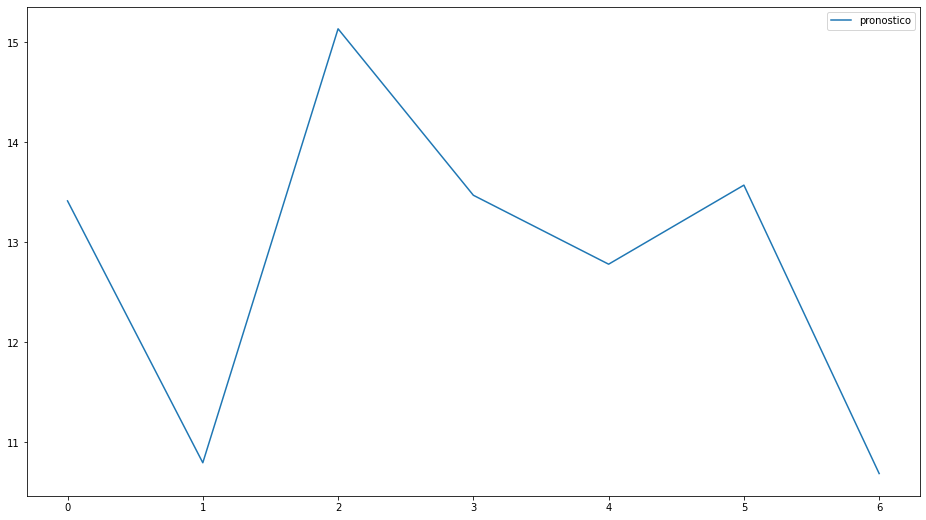

In [ ]:
prediccion1SemanaDiciembre = pd.DataFrame(inverted)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre.plot()
prediccion1SemanaDiciembre.to_csv('pronostico_multivariate.csv')

In [ ]:
prediccion1SemanaDiciembre

pronostico
0   13.410951
1   10.792454
2   15.131873
3   13.467384
4   12.778079
5   13.568488
6   10.684381

# Predicción de Series de Tiempo NN - Embeddings

## Usaremos Keras y Tensorflow

In [ ]:
# Importamos las librerias que vamos a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Input, Embedding, Dense, Flatten, Dropout, concatenate, LSTM
from keras.layers import BatchNormalization, SpatialDropout1D
from keras.callbacks import Callback
from keras.models import Model


In [ ]:
url_3 = 'https://drive.google.com/uc?id=1rJkZRZBdGzlo4Y7IdJh9hO3IGoF0dBBh'
df_3 = pd.read_excel(url_2,  parse_dates=[0], header=None,index_col=0, names=['fecha','PM2_5'])
df_3.head()

PM2_5
fecha            
2019-01-01   14.0
2019-01-02   12.0
2019-01-03    8.0
2019-01-04   16.0
2019-01-05   10.0

In [ ]:
df_3['weekday']=[x.weekday() for x in df.index]
df_3['month']=[x.month for x in df.index]
df_3.head()

PM2_5  weekday  month
fecha                            
2019-01-01   14.0        1      1
2019-01-02   12.0        2      1
2019-01-03    8.0        3      1
2019-01-04   16.0        4      1
2019-01-05   10.0        5      1

In [ ]:
df_3.describe()

PM2_5     weekday       month
count  603.000000  603.000000  603.000000
mean    13.267032    2.996683    5.698176
std      5.978288    2.001658    3.205339
min      2.000000    0.000000    1.000000
25%      9.900000    1.000000    3.000000
50%     12.200000    3.000000    5.000000
75%     16.000000    5.000000    8.000000
max     60.600000    6.000000   12.000000

# Preprocesado de los datos

In [ ]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df_3 = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df_3.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df_3.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# load dataset
values = df_3['PM2_5'].values

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))

values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension

scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, PASOS, 1)
reframed.reset_index(inplace=True, drop=True)

contador=0
reframed['weekday']=df_3['weekday']
reframed['month']=df_3['month']

for i in range(reframed.index[0],reframed.index[-1]):
    reframed['weekday'].loc[contador]=df_3['weekday'][i+8]
    reframed['month'].loc[contador]=df_3['month'][i+8]
    contador=contador+1
reframed.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


var1(t-7)  var1(t-6)  var1(t-5)  ...   var1(t)  weekday  month
0  -0.590444  -0.658703  -0.795222  ... -0.317406      2.0    1.0
1  -0.658703  -0.795222  -0.522184  ... -0.522184      3.0    1.0
2  -0.795222  -0.522184  -0.726962  ... -0.829351      4.0    1.0
3  -0.522184  -0.726962  -0.556314  ... -0.556314      5.0    1.0
4  -0.726962  -0.556314  -0.829351  ... -0.726962      6.0    1.0

[5 rows x 10 columns]

In [ ]:
reordenado=reframed[ ['weekday','month','var1(t-7)','var1(t-6)','var1(t-5)','var1(t-4)','var1(t-3)','var1(t-2)','var1(t-1)','var1(t)'] ]
reordenado.dropna(inplace=True)
reordenado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


weekday  month  var1(t-7)  ...  var1(t-2)  var1(t-1)   var1(t)
0        2.0    1.0  -0.590444  ...  -0.556314  -0.829351 -0.317406
1        3.0    1.0  -0.658703  ...  -0.829351  -0.317406 -0.522184
2        4.0    1.0  -0.795222  ...  -0.317406  -0.522184 -0.829351
3        5.0    1.0  -0.522184  ...  -0.522184  -0.829351 -0.556314
4        6.0    1.0  -0.726962  ...  -0.829351  -0.556314 -0.726962
..       ...    ...        ...  ...        ...        ...       ...
590      4.0    8.0  -0.648464  ...  -0.709898  -0.699659 -0.672355
591      5.0    8.0  -0.726962  ...  -0.699659  -0.672355 -0.675768
592      6.0    8.0  -0.723549  ...  -0.672355  -0.675768 -0.706485
593      0.0    8.0  -0.726962  ...  -0.675768  -0.706485 -0.795222
594      1.0    8.0  -0.723549  ...  -0.706485  -0.795222 -0.788396

[595 rows x 10 columns]

# Dividimos en set de Entrenamiento y Validación

In [ ]:
training_data = reordenado.drop('var1(t)',axis=1)#.values
target_data=reordenado['var1(t)']
#training_data.head()
valid_data = training_data[595-30:595]
valid_target=target_data[595-30:595]

training_data = training_data[0:595]
target_data=target_data[0:595]
print(training_data.shape,target_data.shape,valid_data.shape,valid_target.shape)
#training_data.head()

(595, 9) (595,) (30, 9) (30,)


# Creamos el Modelo de Red Neuronal

## Utilizaremos una Red Feedforward con Embeddings

## Tenemos como entradas 9 columnas (2 embeddings y 7 pasos)

In [ ]:
def crear_modeloEmbeddings():
    emb_dias = 2 #tamaño profundidad de embeddings
    emb_meses = 4

    in_dias = Input(shape=[1], name = 'dias')
    emb_dias = Embedding(7+1, emb_dias)(in_dias)
    in_meses = Input(shape=[1], name = 'meses')
    emb_meses = Embedding(12+1, emb_meses)(in_meses)

    in_cli = Input(shape=[PASOS], name = 'cli')

    fe = concatenate([(emb_dias), (emb_meses)])

    x = Flatten()(fe)
    x = Dense(PASOS,activation='tanh')(x)
    outp = Dense(1,activation='tanh')(x)
    model = Model(inputs=[in_dias,in_meses,in_cli], outputs=outp)

    model.compile(loss='mean_absolute_error', 
                  optimizer='adam',
                  metrics=['MSE'])

    model.summary()
    return model

# Entrenamos nuestra máquina

In [ ]:
EPOCHS=40

model = crear_modeloEmbeddings()

continuas=training_data[['var1(t-7)','var1(t-6)','var1(t-5)','var1(t-4)','var1(t-3)','var1(t-2)','var1(t-1)']]
valid_continuas=valid_data[['var1(t-7)','var1(t-6)','var1(t-5)','var1(t-4)','var1(t-3)','var1(t-2)','var1(t-1)']]

history=model.fit([training_data['weekday'],training_data['month'],continuas], target_data, epochs=EPOCHS
                 ,validation_data=([valid_data['weekday'],valid_data['month'],valid_continuas],valid_target))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
dias (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
meses (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 2)         16          dias[0][0]                       
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 4)         52          meses[0][0]                      
______________________________________________________________________________________________

# Visualizamos Resultados

30


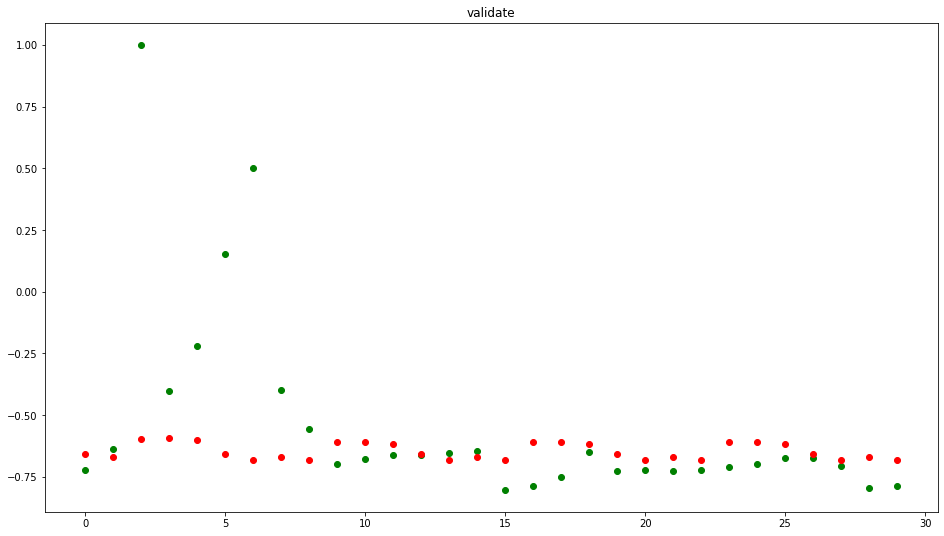

In [ ]:
results=model.predict([valid_data['weekday'],valid_data['month'],valid_continuas])
print( len(results) )
plt.scatter(range(len(valid_target)),valid_target,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

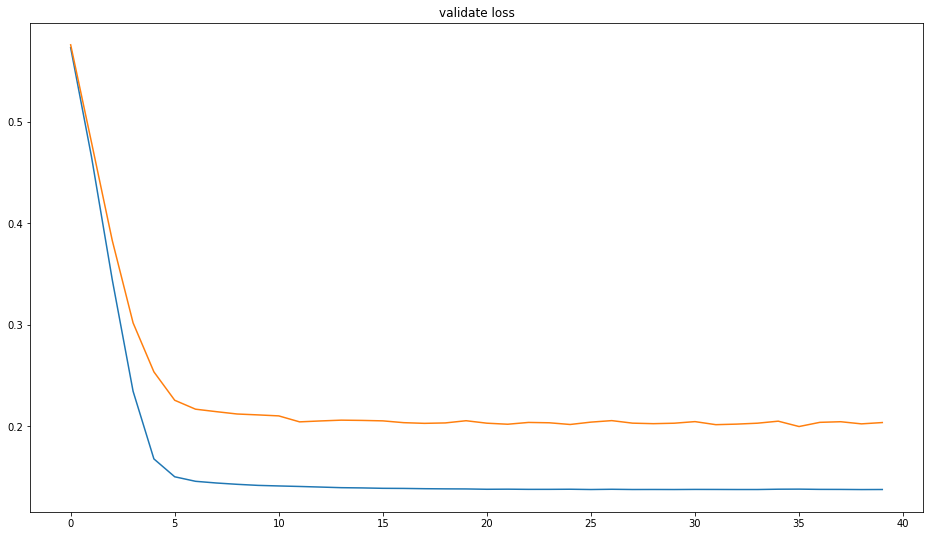

In [ ]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.plot(history.history['val_loss'])
plt.title('validate loss')
plt.show()

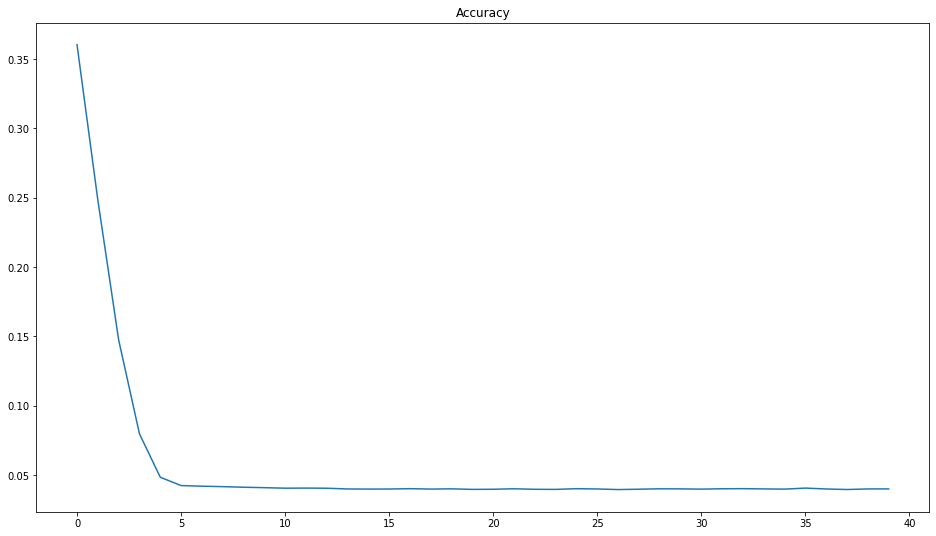

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['MSE'])
plt.show()

In [ ]:
compara = pd.DataFrame(np.array([valid_target, [x[0] for x in results]])).transpose()
compara.columns = ['real', 'prediccion']

inverted = scaler.inverse_transform(compara.values)

compara2 = pd.DataFrame(inverted)
compara2.columns = ['real', 'prediccion']
compara2['diferencia'] = compara2['real'] - compara2['prediccion']
compara2.head(12)

real  prediccion  diferencia
0   10.100000   12.025581   -1.925581
1   12.600000   11.720348    0.879652
2   60.600002   13.821555   46.778446
3   19.500000   13.885978    5.614022
4   24.799999   13.647541   11.152458
5   35.799999   11.964017   23.835983
6   46.000000   11.272090   34.727909
7   19.600000   11.647381    7.952620
8   15.000000   11.349879    3.650121
9   10.800001   13.388769   -2.588768
10  11.400000   13.453523   -2.053523
11  11.899999   13.218911   -1.318913

In [ ]:
compara2.describe()

real  prediccion  diferencia
count  30.000000   30.000000   30.000000
mean   15.450000   12.340603    3.109397
std    11.906700    0.966365   11.791638
min     7.800001   11.272090   -5.188769
25%    10.100000   11.424255   -2.454957
50%    11.449999   11.964017   -1.210984
75%    12.550000   13.388769    0.866717
max    60.600002   13.885978   46.778446

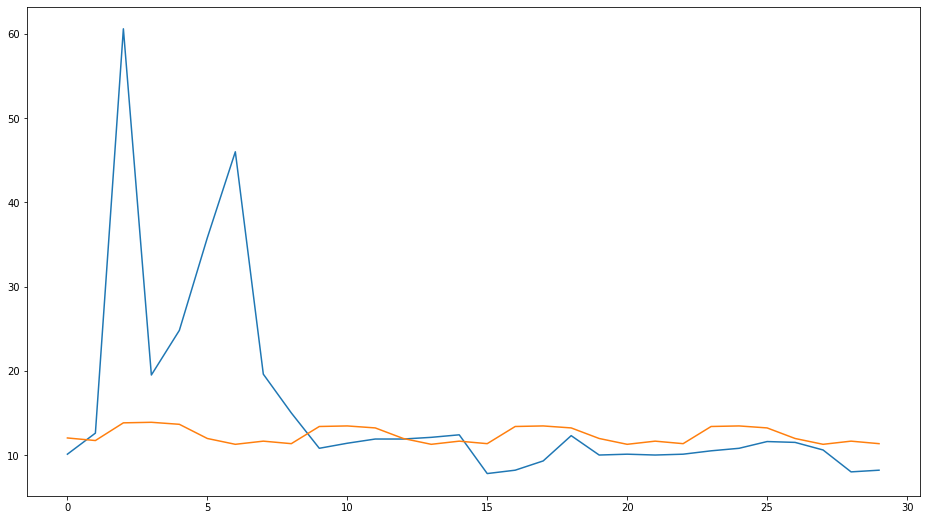

In [ ]:
compara2['real'].plot()
compara2['prediccion'].plot()

# Pronóstico

## A partir de la última semana de noviembre de 2019, intentaremos predecir la primer semana de diciembre

In [ ]:
ultimosDias = df_3['2019-11-16':'2019-11-30']
ultimosDias

PM2_5  weekday  month
fecha                            
2019-11-16   11.0        5     11
2019-11-17    8.8        6     11
2019-11-18   14.4        0     11
2019-11-19   20.6        1     11
2019-11-20   18.1        2     11
2019-11-21   16.5        3     11
2019-11-22   17.4        4     11
2019-11-23   15.5        5     11
2019-11-24   14.3        6     11
2019-11-25   10.7        0     11
2019-11-26   17.1        1     11
2019-11-27   15.6        2     11
2019-11-28   14.3        3     11
2019-11-29   13.2        4     11
2019-11-30   10.4        5     11

# Preparamos los datos para Test

In [ ]:
# load dataset
values = ultimosDias['PM2_5'].values

# ensure all data is float
values = values.astype('float32')
# normalize features
#scaler = MinMaxScaler(feature_range=(-1, 1))

values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension

scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, PASOS, 1)
reframed.reset_index(inplace=True, drop=True)

contador=0
reframed['weekday']=ultimosDias['weekday']
reframed['month']=ultimosDias['month']

for i in range(reframed.index[0],reframed.index[-1]):
    reframed['weekday'].loc[contador]=ultimosDias['weekday'][i+8]
    reframed['month'].loc[contador]=ultimosDias['month'][i+8]
    contador=contador+1
reframed.head()

reordenado=reframed[ ['weekday','month','var1(t-7)','var1(t-6)','var1(t-5)','var1(t-4)','var1(t-3)','var1(t-2)','var1(t-1)'] ]
reordenado.dropna(inplace=True)
reordenado

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


weekday  month  var1(t-7)  ...  var1(t-3)  var1(t-2)  var1(t-1)
0      6.0   11.0  -0.627119  ...   0.576271   0.305085   0.457627
1      0.0   11.0  -1.000000  ...   0.305085   0.457627   0.135593
2      1.0   11.0  -0.050848  ...   0.457627   0.135593  -0.067797
3      2.0   11.0   1.000000  ...   0.135593  -0.067797  -0.677966
4      3.0   11.0   0.576271  ...  -0.067797  -0.677966   0.406780
5      4.0   11.0   0.305085  ...  -0.677966   0.406780   0.152542
6      5.0   11.0   0.457627  ...   0.406780   0.152542  -0.067797

[7 rows x 9 columns]

In [ ]:
values = reordenado.values
x_test = values[5:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
print(x_test)
ultDiaSemana = reordenado.weekday[len(reordenado.index)-1]
ultDiaSemana

(2, 1, 9)
[[[ 4.         11.          0.30508471  0.45762682  0.13559294
   -0.06779671 -0.67796636  0.40677953  0.15254235]]

 [[ 5.         11.          0.45762682  0.13559294 -0.06779671
   -0.67796636  0.40677953  0.15254235 -0.06779671]]]


5.0

In [ ]:
def agregarNuevoValor(x_test,nuevoValor,ultDiaSemana):
    for i in range(x_test.shape[2]-3):
        x_test[0][0][i+2] = x_test[0][0][i+3]
    ultDiaSemana=ultDiaSemana+1
    if ultDiaSemana>6:
        ultDiaSemana=0
    x_test[0][0][0]=ultDiaSemana
    x_test[0][0][1]=12
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test,ultDiaSemana

# Pronóstico para la "Próxima semana"

In [ ]:
results=[]
for i in range(7):
    dia=np.array([x_test[0][0][0]])
    mes=np.array([x_test[0][0][1]])
    valores=np.array([x_test[0][0][2:9]])
    parcial=model.predict([dia, mes, valores])
    results.append(parcial[0])
    print('pred',i,x_test)
    x_test,ultDiaSemana=agregarNuevoValor(x_test,parcial[0],ultDiaSemana)

pred 0 [[[ 4.         11.          0.30508471  0.45762682  0.13559294
   -0.06779671 -0.67796636  0.40677953  0.15254235]]

 [[ 5.         11.          0.45762682  0.13559294 -0.06779671
   -0.67796636  0.40677953  0.15254235 -0.06779671]]]
pred 1 [[[ 6.         12.          0.45762682  0.13559294 -0.06779671
   -0.67796636  0.40677953  0.15254235 -0.60180163]]

 [[ 5.         11.          0.45762682  0.13559294 -0.06779671
   -0.67796636  0.40677953  0.15254235 -0.06779671]]]
pred 2 [[[ 0.         12.          0.13559294 -0.06779671 -0.67796636
    0.40677953  0.15254235 -0.60180163 -0.65374535]]

 [[ 5.         11.          0.45762682  0.13559294 -0.06779671
   -0.67796636  0.40677953  0.15254235 -0.06779671]]]
pred 3 [[[ 1.         12.         -0.06779671 -0.67796636  0.40677953
    0.15254235 -0.60180163 -0.65374535 -0.64000237]]

 [[ 5.         11.          0.45762682  0.13559294 -0.06779671
   -0.67796636  0.40677953  0.15254235 -0.06779671]]]
pred 4 [[[ 2.         12.         -0

# Re-Convertimos los resultados

In [ ]:
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)
inverted

[array([-0.60180163], dtype=float32), array([-0.65374535], dtype=float32), array([-0.64000237], dtype=float32), array([-0.65089226], dtype=float32), array([-0.57603073], dtype=float32), array([-0.5737444], dtype=float32), array([-0.5822257], dtype=float32)]


array([[11.14937143],
       [10.84290349],
       [10.92398709],
       [10.85973676],
       [11.30141975],
       [11.31490901],
       [11.26486955]])

# Visualizamos el pronóstico

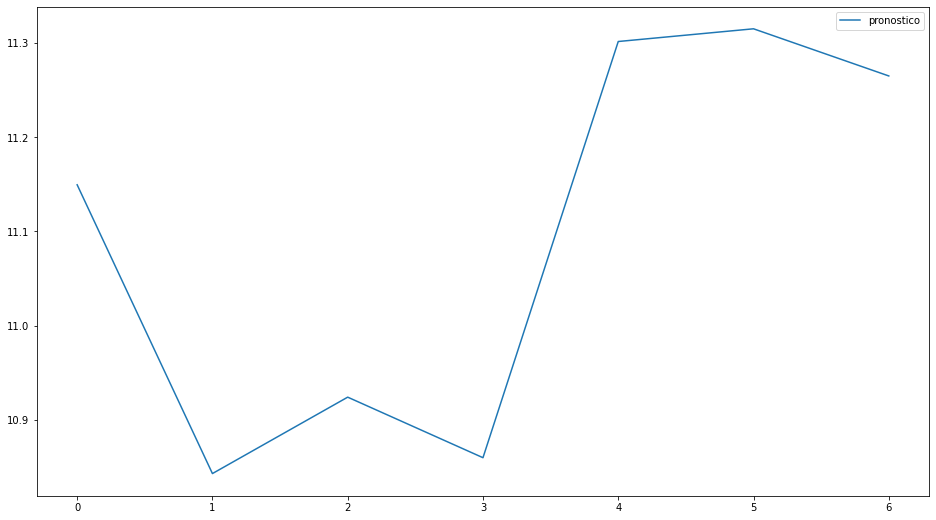

In [ ]:
prediccion1SemanaDiciembre = pd.DataFrame(inverted)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre.plot()
prediccion1SemanaDiciembre.to_csv('pronostico_embeddings.csv')

In [ ]:
prediccion1SemanaDiciembre

pronostico
0   11.149371
1   10.842903
2   10.923987
3   10.859737
4   11.301420
5   11.314909
6   11.264870